In [10]:
# from ff_energy.simulations import dipole as dipole
from ff_energy.simulations.dipole import dipole_dcm
from ff_energy.simulations.dipole import *
%load_ext autoreload
%autoreload 2

XLIM = (3686-50, 3686+50)

In [11]:
xs = []
ys = []
with open("/home/boittier/Downloads/waterIR.jdx") as f:
    lines = f.readlines()[37:-2]
    for line in lines:
        x, y = [float(_) for _ in line.split()][:2]
        xs.append(x)
        ys.append(1 - y)
water_exp_spectrum = [xs, ys]


# load data

Average dipole:  1.9705805675689623


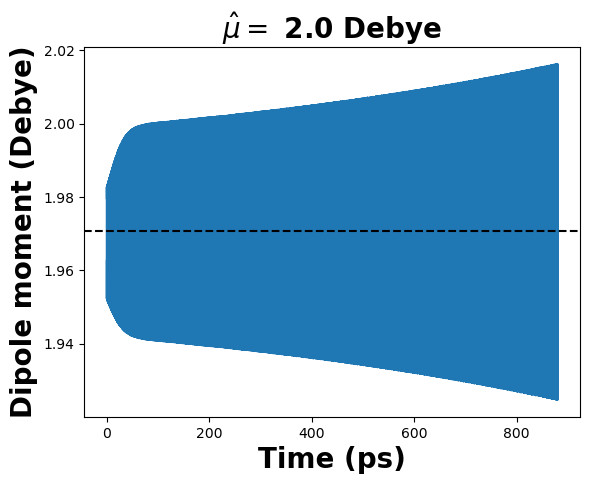

Nframes:  4401626


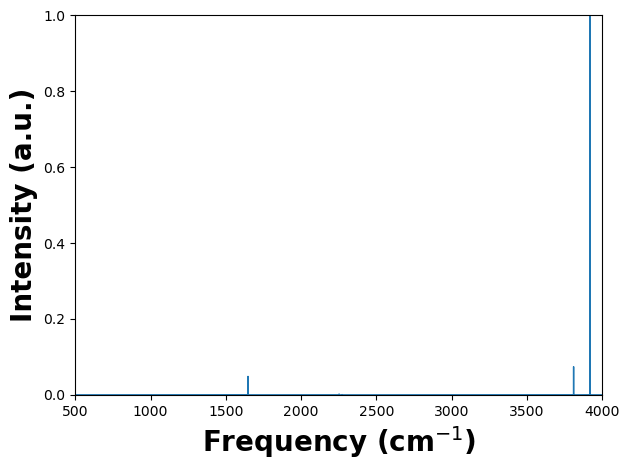

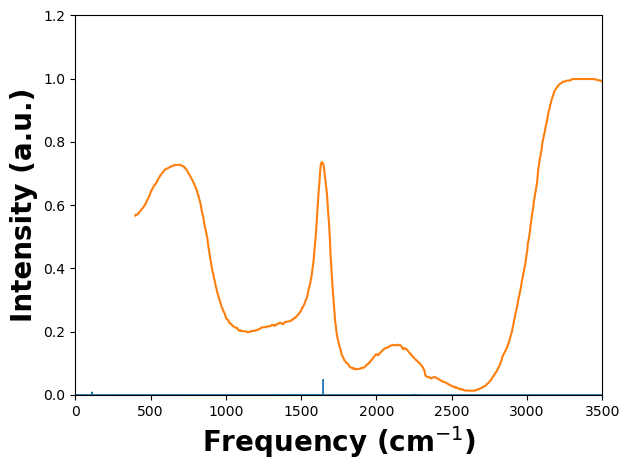

(3000.0, 3500.0)

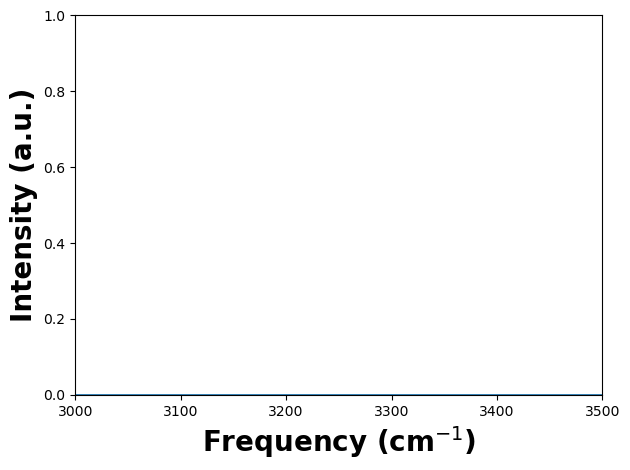

In [65]:
timestep = 0.0002
save_freq = 1
effective_timestep = timestep * save_freq

# file = "/home/boittier/pcbach/waterlj/kjobbayes2-60-336a8abb-f9c3-4fd0-baa0-0d609843c71e/fort.14"
# file = "/home/boittier/pcbehome/kmdcm_nn_water1/fort.15"
# file = "/home/boittier/pcbach/kmdcm_water_sim_rkhs_copy/ir.dat"
file = "/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a/single_water/fort.14"

dipole_dcm("MDCM-nn", file, effective_timestep=effective_timestep, NSKIP=0)
plt.show()
plot_spectra(None, None, filename="MDCM-nn", csv="MDCM-nn.csv", Nsmooth=10)
plt.plot(water_exp_spectrum[0], np.array(water_exp_spectrum[1]), label="Exp.")
plt.xlim(0,3500)
plt.ylim(0, 1.2)
plt.show()
plot_spectra(None, None, filename="MDCM-nn", csv="MDCM-nn.csv", Nsmooth=1)
# plot_spectra(None, None, filename="kMDCM_liquid_OH", csv="kMDCM_liquid.csv", Nsmooth=50, xlim=(3600,3900), axvlines=[3686])
plt.xlim(3000,3500)

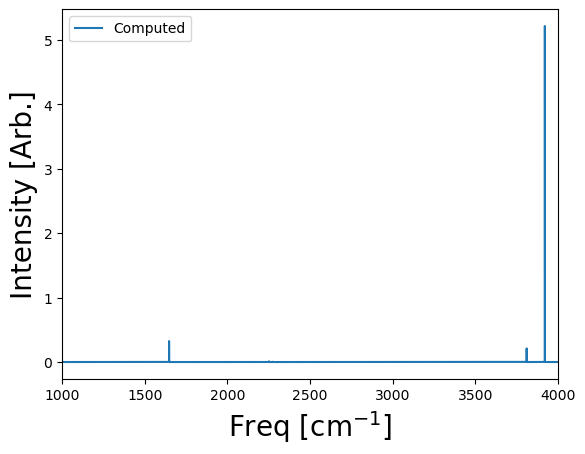

In [66]:
_df = pd.read_csv("MDCM-nn.csv")
_df["Computed"] = _df["spectra"] 
_df.plot("freq", "Computed")
# plt.xlim(0, 4000)
# plt.plot(water_exp_spectrum[0], np.array(water_exp_spectrum[1])*0.5, label="Exp.")
plt.xlim(1000,4000)
plt.legend()
# plt.ylim(0,2)
plt.xlabel("Freq [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensity [Arb.]", fontsize=20)
plt.savefig("IR.pdf", bbox_inches="tight")
# plt.xlim(1500, 1800)

In [72]:
from scipy.signal import find_peaks

peak_pos = find_peaks(_df["Computed"])

peaks = _df.iloc[peak_pos[0]]

peaks_sorted = peaks[peaks["Computed"] > -100]
_ = peaks_sorted[peaks_sorted["freq"] < 4000]
_[_["freq"] > 3000].sort_values("Computed")

,freq,spectra,Computed
81397,3084.214408,2.884244e-11,2.884244e-11
80864,3064.018501,3.060517e-11,3.060517e-11
79571,3015.025427,3.341375e-11,3.341375e-11
80366,3045.148779,3.517914e-11,3.517914e-11
80791,3061.252457,3.766145e-11,3.766145e-11
...,...,...,...
100547,3809.827218,7.719736e-02,7.719736e-02
103447,3919.711143,1.708218e-01,1.708218e-01
100544,3809.713545,1.939375e-01,1.939375e-01
100540,3809.561981,2.106522e-01,2.106522e-01


In [37]:
peak_pos[0].shape, _df

((323918,),
                  freq       spectra      Computed
 0            0.000000  4.460883e-04  2.230442e-01
 1            0.063409  2.855524e-04  1.427762e-01
 2            0.126818  5.004725e-05  2.502362e-02
 3            0.190228  5.647109e-06  2.823554e-03
 4            0.253637  3.820198e-06  1.910099e-03
 ...               ...           ...           ...
 1315121  83390.738458  2.707410e-12  1.353705e-09
 1315122  83390.801867  1.097798e-11  5.488990e-09
 1315123  83390.865277  1.341485e-11  6.707423e-09
 1315124  83390.928686  1.167070e-11  5.835352e-09
 1315125  83390.992095  7.410647e-12  3.705324e-09
 
 [1315126 rows x 3 columns])

In [ ]:
psf_path = "/home/boittier/pcbach/kmdcm_water_sim_rkhs_copy/single_water/water.1.psf"
dcd_path = "/home/boittier/pcbach/kmdcm_nn_water1/water.2000.nve.ir.dcd"
# dcd_path = "/home/boittier/pcbach/kmdcm_water_sim_rkhs_copy/single_water/water.1.nve.dcd"
timestep = 0.0002
save_freq = 1
effective_timestep = timestep * save_freq

dipole_dcd(f"test_", psf_path, dcd_path, effective_timestep=effective_timestep, nsmooth=1, NSKIP=0)

<AxesSubplot:xlabel='Frequency (cm$^{-1}$)', ylabel='Intensity (a.u.)'>

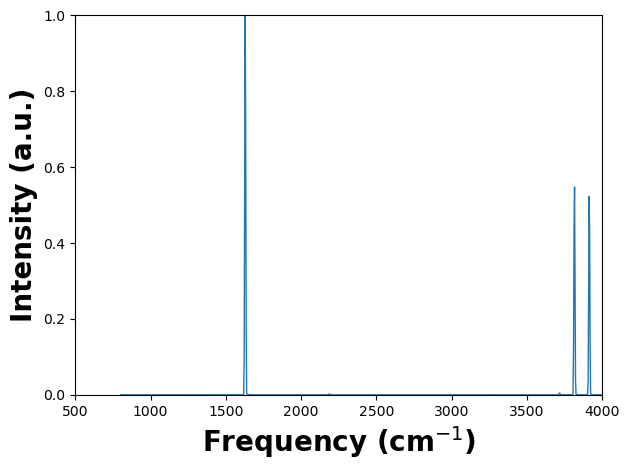

In [45]:
plot_spectra(None, None, filename="test_", csv="test_.csv", Nsmooth=1)

In [4]:
chapados = """220.11661807580094, -0.2011305721852521
300.2915451895042, -0.18911267887743932
380.4664723032065, -0.146560434424587
438.775510204081, -0.06731355573854358
533.5276967930022, 0.0423786526606289
599.1253644314866, 0.10328711637326737
650.1457725947521, 0.13980370774263928
708.4548104956266, 0.15187501390959923
752.1865889212822, 0.09680635613023902
817.7842565597666, -0.007170676340328086
876.0932944606402, -0.12334364498252892
934.4023323615156, -0.20287539225068318
1058.3090379008745, -0.24592615672222973
1211.3702623906702, -0.2646206574232748
1327.98833819242, -0.25879865577637684
1473.7609329446059, -0.24083413081699323
1561.224489795918, -0.21662030133754673
1608.6005830903769, -0.10986580019139325
1648.6880466472303, -0.0030934947588621142
1674.1982507288612, -0.052010771593261396
1699.708454810495, -0.13756926980170459
1721.5743440233227, -0.22311886586695628
1765.3061224489793, -0.2781875236463174
1903.7900874635561, -0.29684641577459736
2086.0058309037895, -0.27897091224712334
2202.6239067055385, -0.2792557808292342
2428.5714285714275, -0.30423519462310544
2639.9416909620986, -0.3169652593861967
2887.7551020408155, -0.2809293837491378
3018.950437317784, -0.17132619678187488
3084.5481049562677, 0.011719671510917351
3150.1457725947516, 0.24362050163576932
3179.3002915451893, 0.4450760020474931
3223.0320699708454, 0.701457725947523
3266.763848396501, 0.8784501368704518
3346.9387755102034, 1.171384060712617
3368.8046647230317, 1.2995749226626314
3419.825072886297, 1.4093739567800947
3463.5568513119533, 1.274915986023636
3507.288629737609, 1.0549618320610694
3529.1545189504373, 0.8717023123316947
3558.3090379008745, 0.6762112478579221
3572.8862973760934, 0.4624351812698917
3623.9067055393584, 0.24857009324995083
3653.061224489795, 0.03475841808915536
3696.7930029154513, -0.2523713083924948
3827.988338192419, -0.30765361760843923
3988.338192419825, -0.33857966305388043"""

In [5]:
xy = np.array([[float(x[:-1]) for x in _.split()] for _ in chapados.split("\n")])
x, y = xy.T

<AxesSubplot:xlabel='Frequency (cm$^{-1}$)', ylabel='Intensity (a.u.)'>

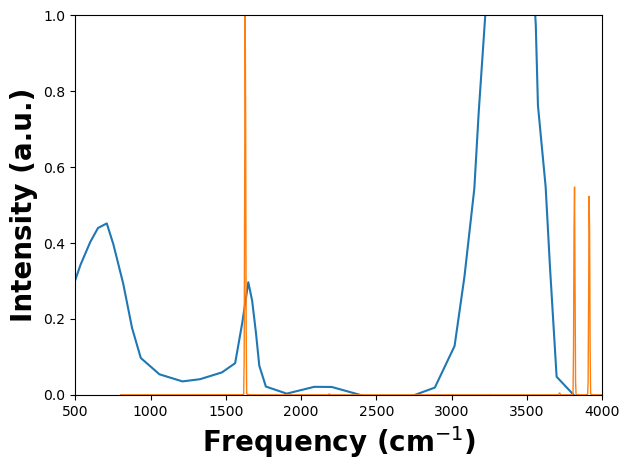

In [32]:
plt.plot(x, y + 0.3)
plot_spectra(None, None, filename="test_", csv="test_.csv", Nsmooth=1)

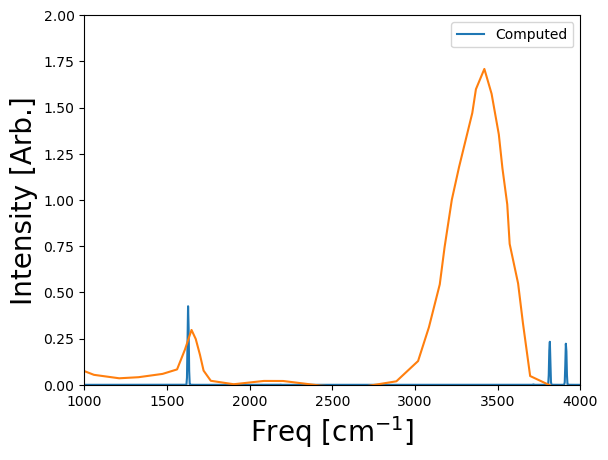

In [49]:
_df = pd.read_csv("test_.csv")
_df["Computed"] = _df["spectra"] * 10
_df.plot("freq", "Computed")
plt.xlim(0, 4000)
# plt.plot(water_exp_spectrum[0], np.array(water_exp_spectrum[1])*0.5, label="Exp.")
plt.plot(x, y + 0.3)
plt.xlim(1000,4000)
plt.legend()
plt.ylim(0,2)
plt.xlabel("Freq [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensity [Arb.]", fontsize=20)
plt.savefig("IR.pdf", bbox_inches="tight")

In [50]:
_df[_df["Computed"] > 0.008]

,freq,spectra,Computed
486,1621.121503,0.003862,0.038623
487,1624.457144,0.023373,0.233726
488,1627.792785,0.042518,0.425183
489,1631.128426,0.030512,0.305120
490,1634.464066,0.007527,0.075269
1142,3809.301967,0.005305,0.053054
1143,3812.637608,0.018591,0.185911
1144,3815.973249,0.023296,0.232958
1145,3819.308890,0.011426,0.114259
1146,3822.644531,0.001552,0.015515


Average dipole:  108.1934706429423


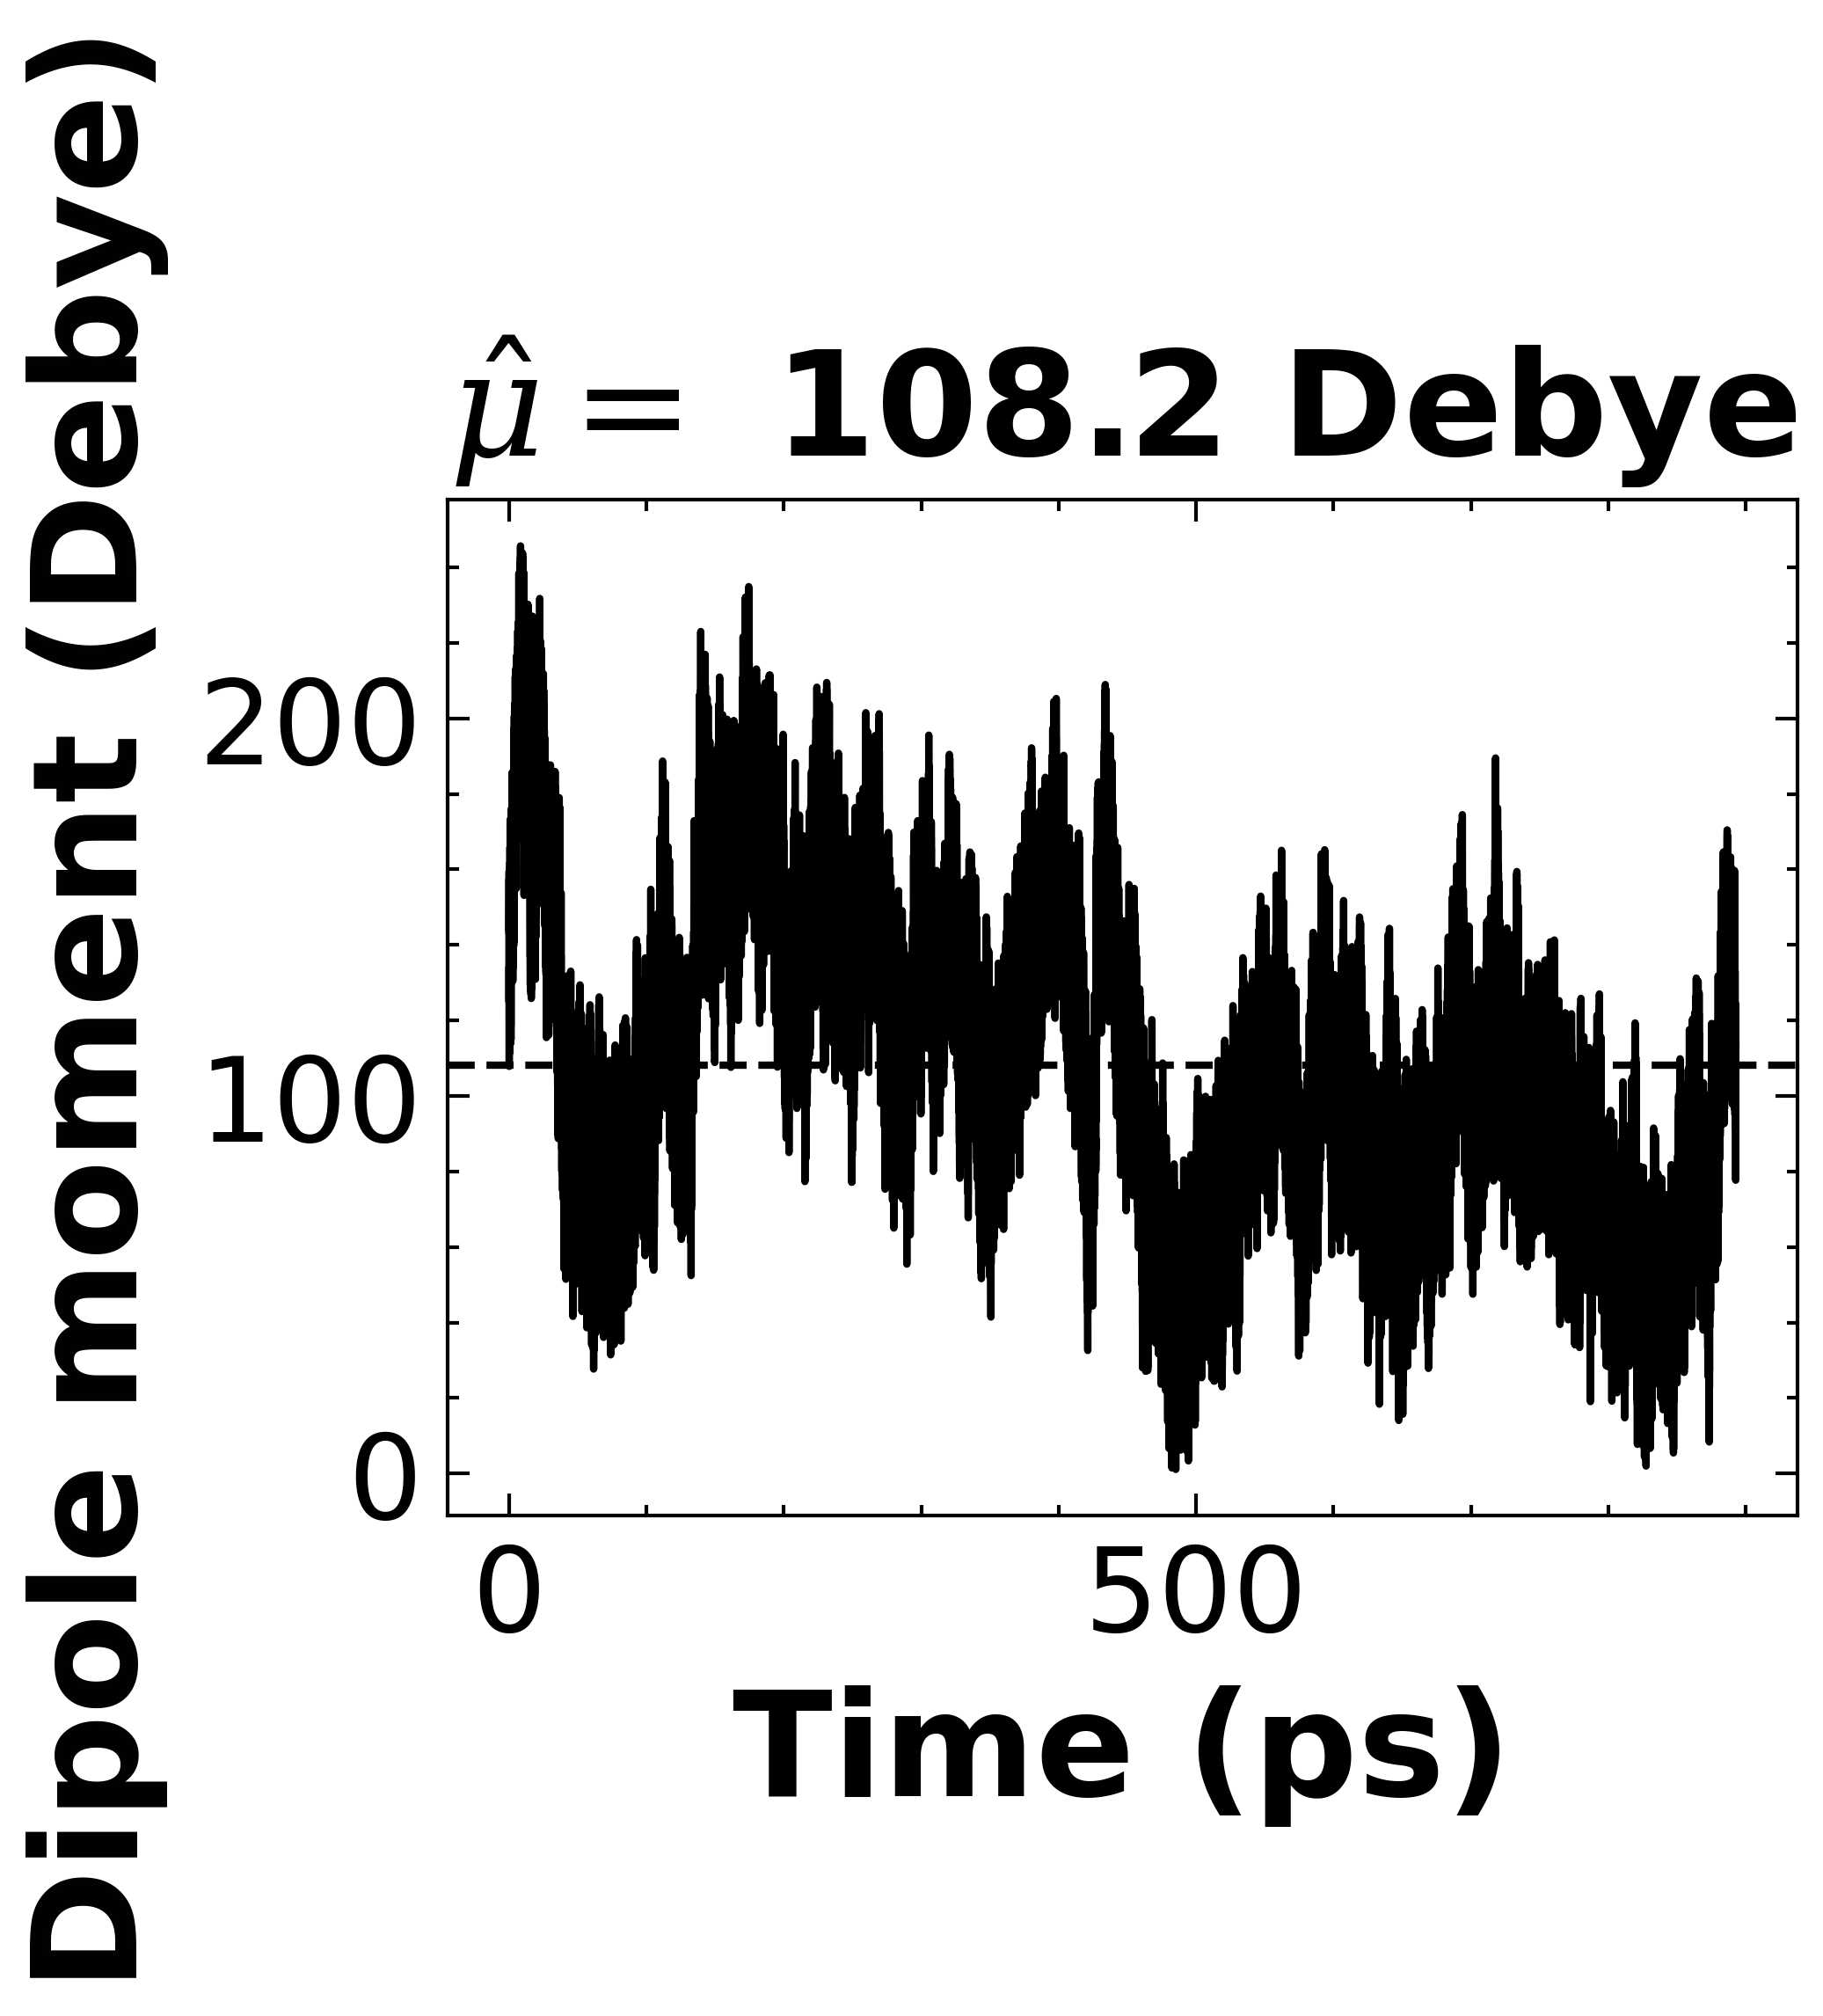

Nframes:  4463841


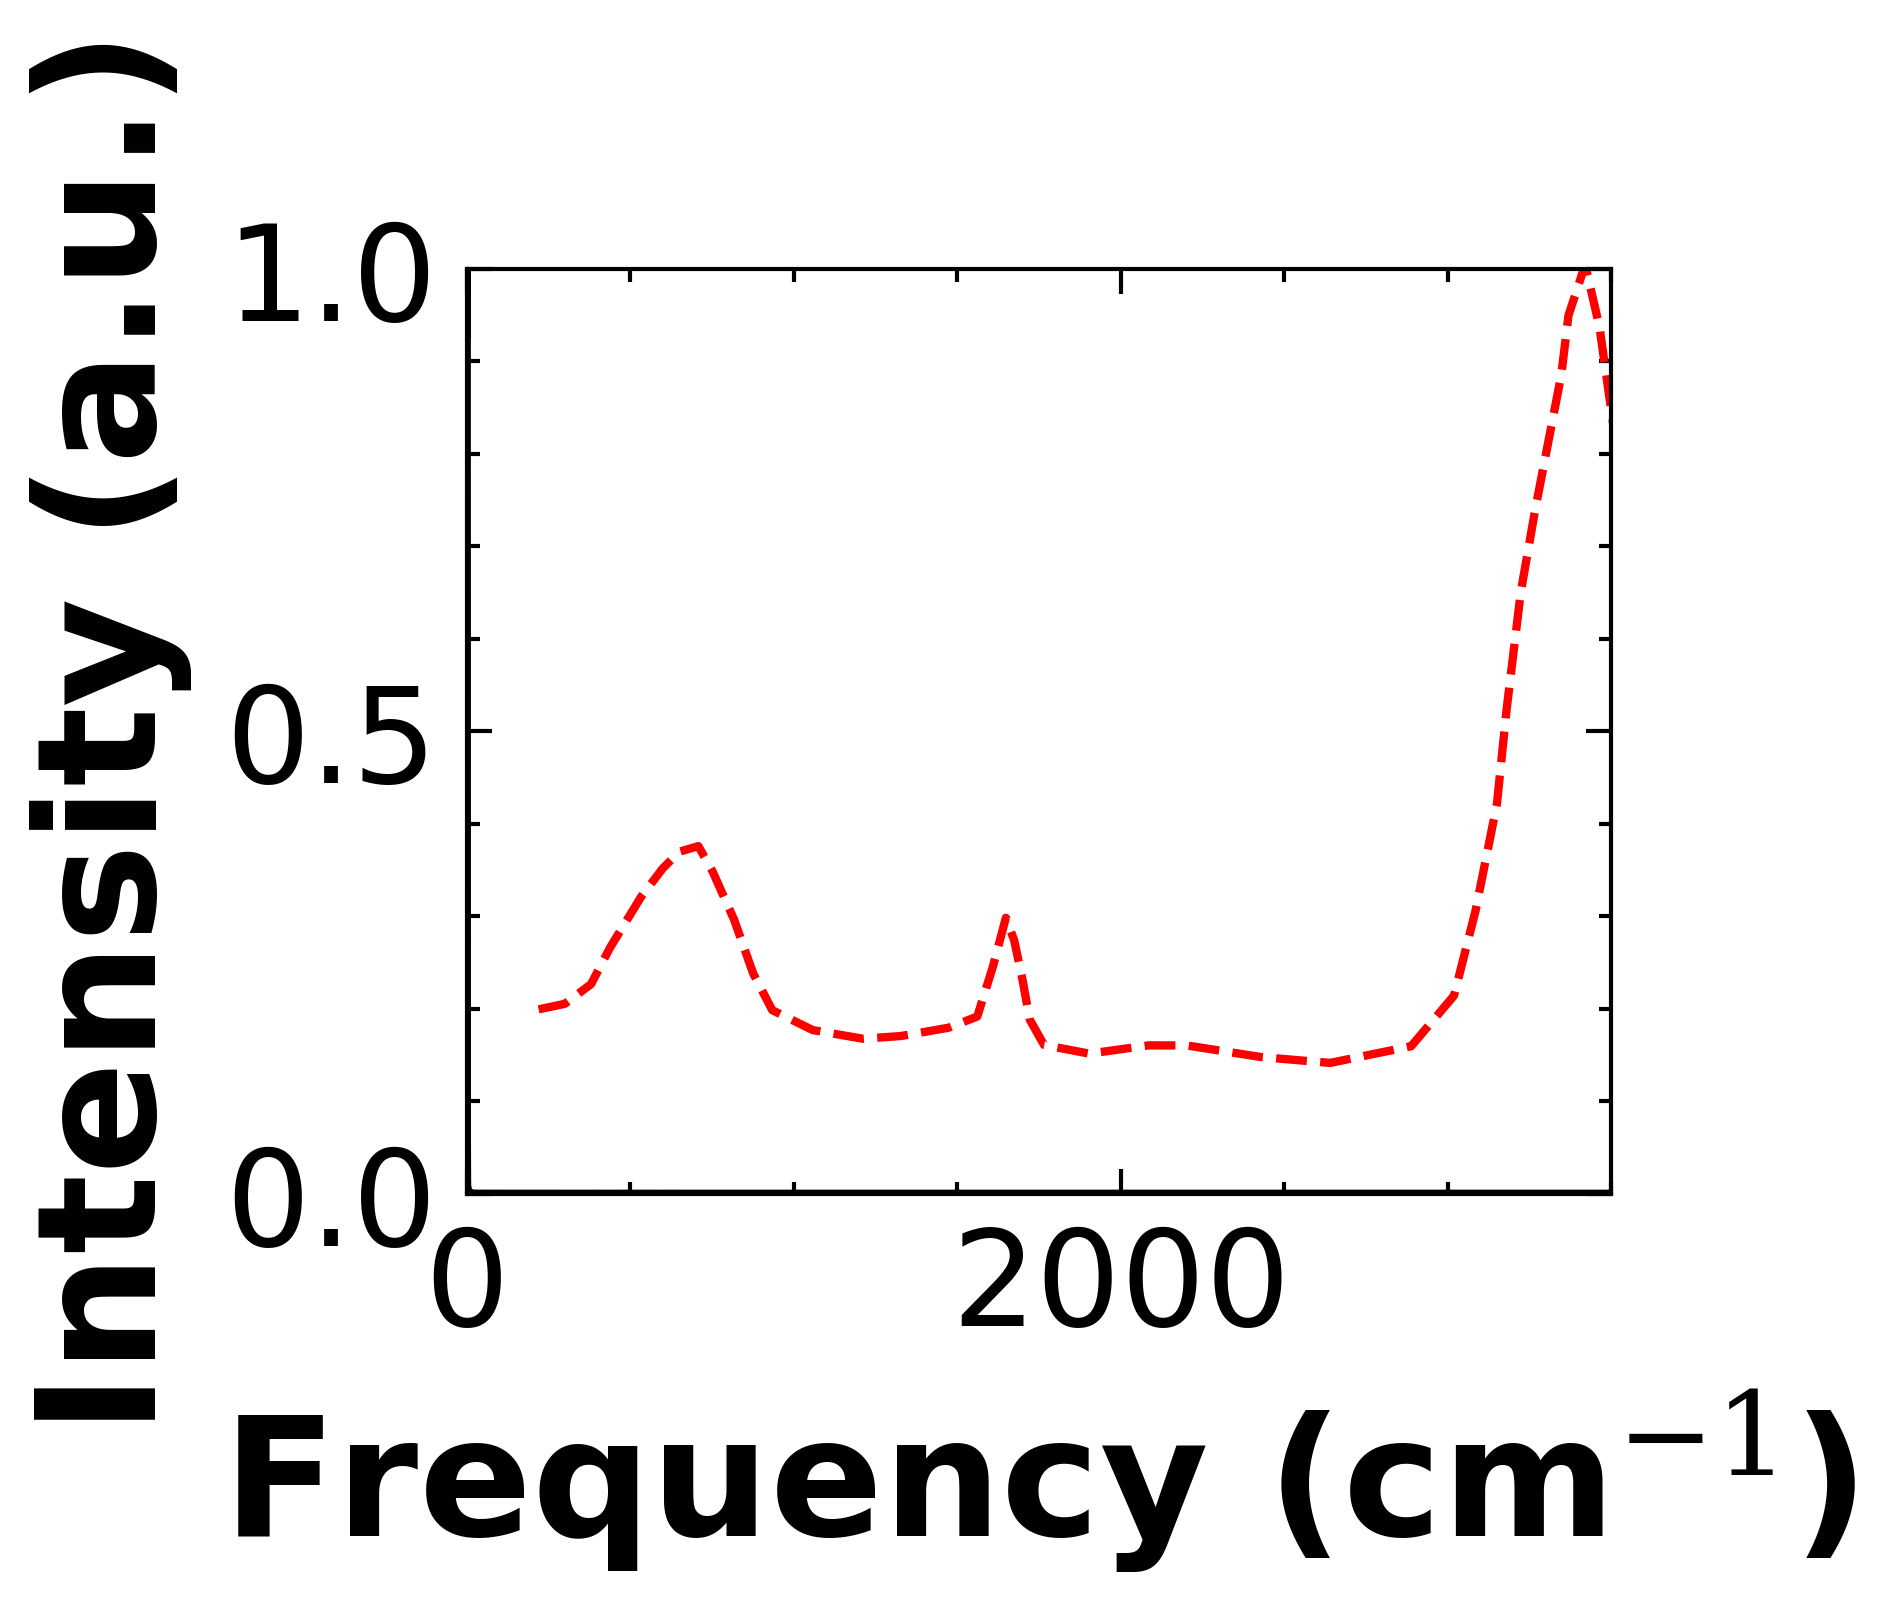

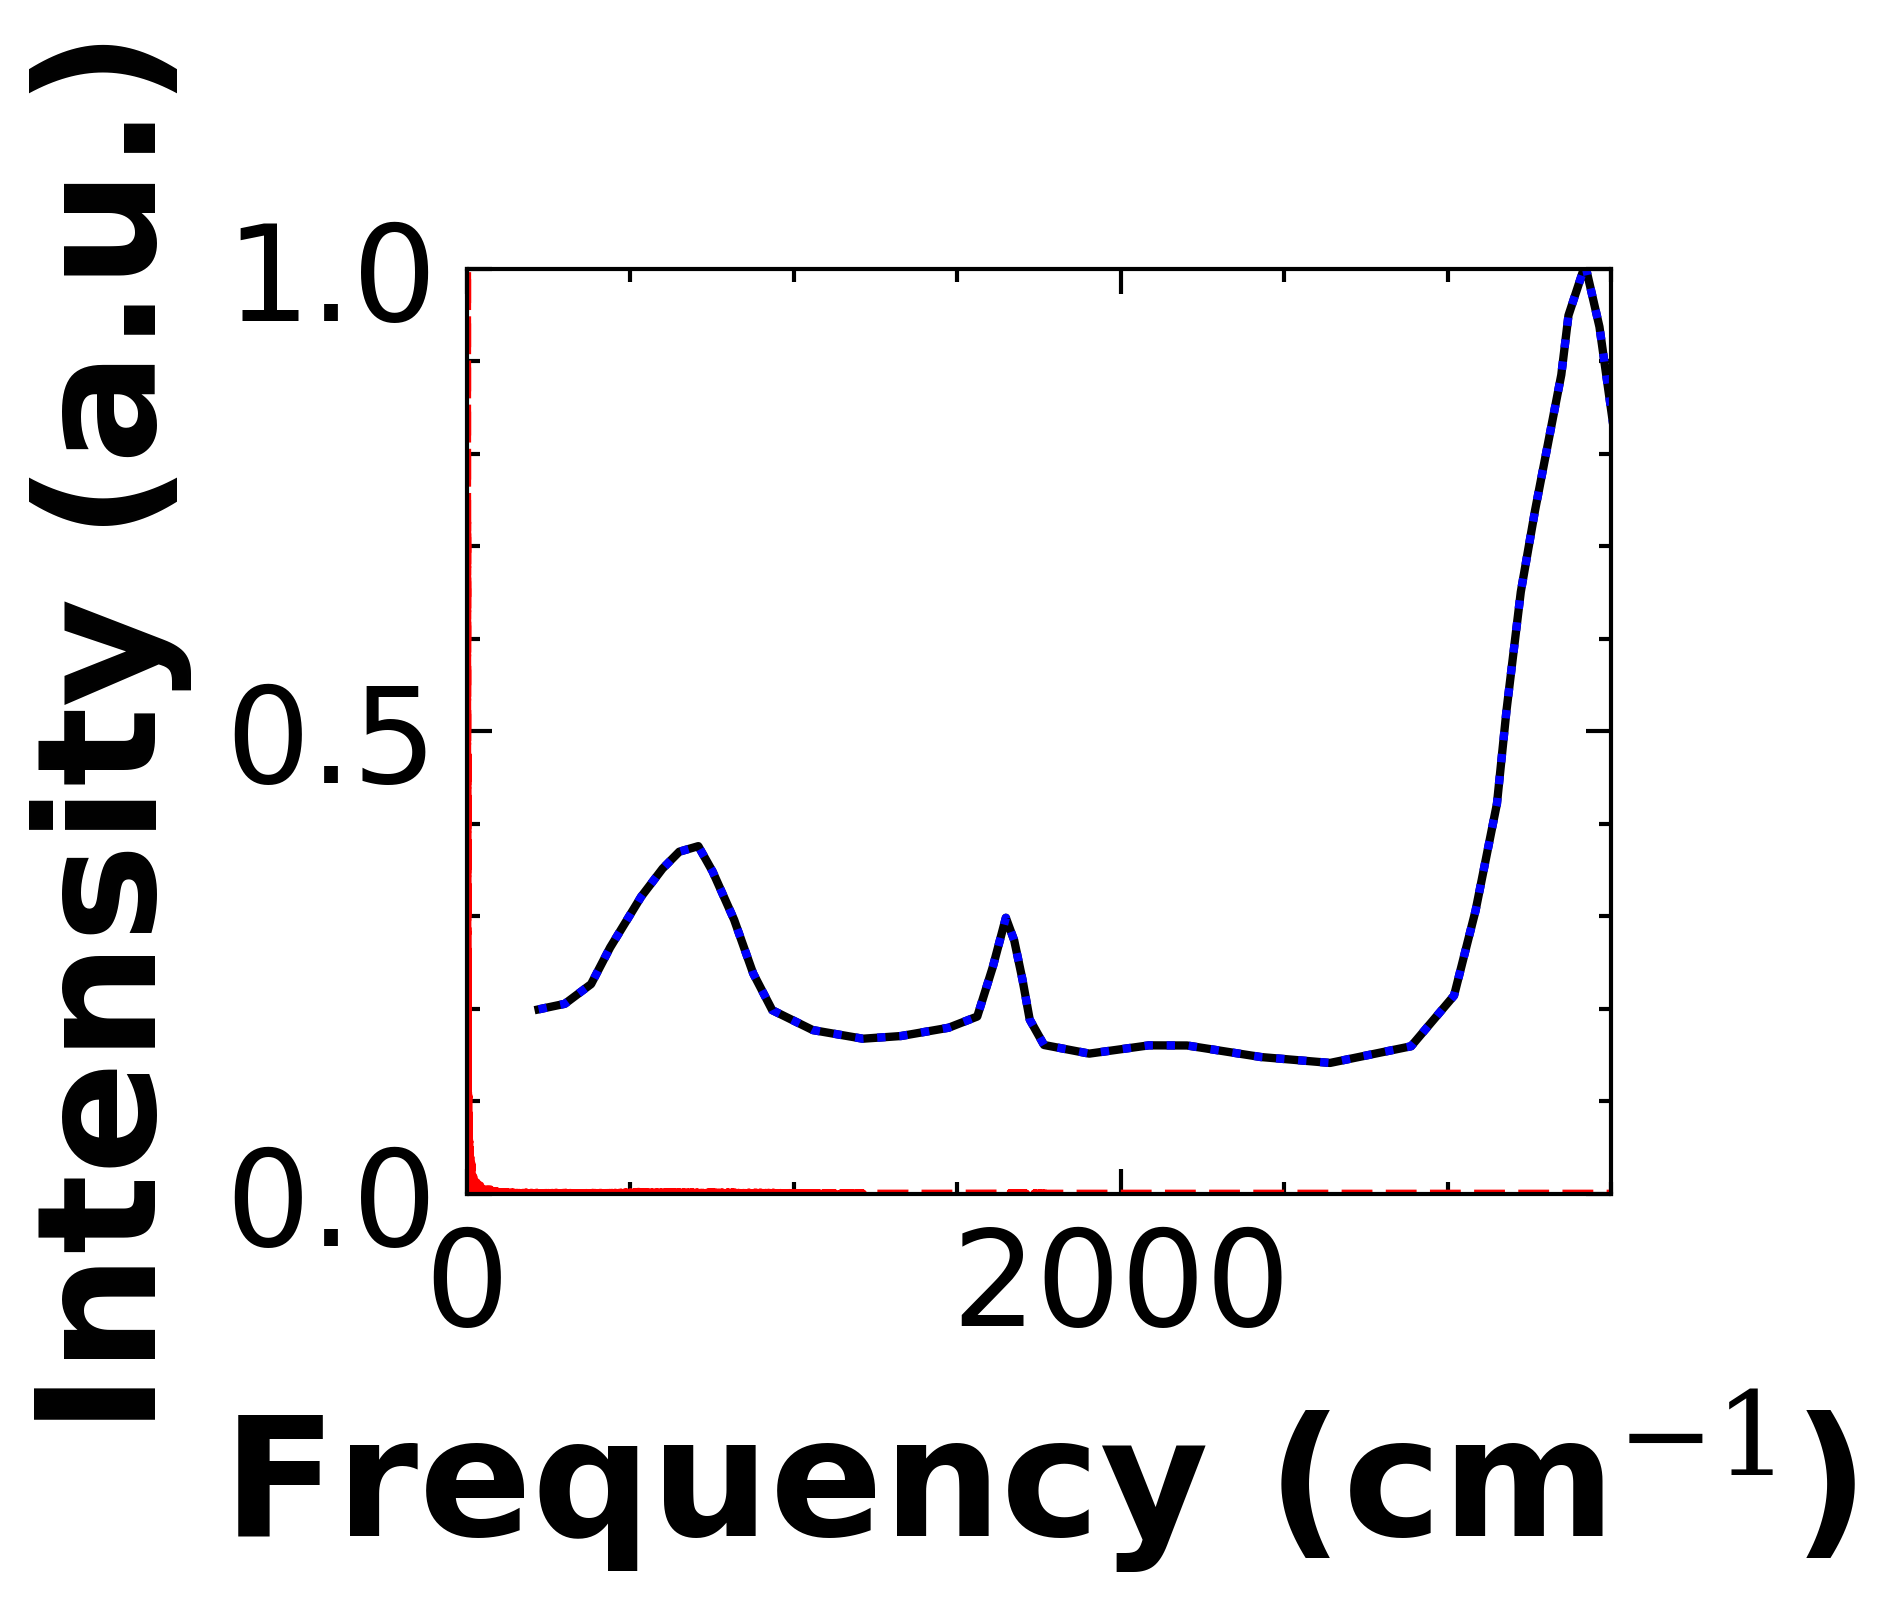

In [54]:
timestep = 0.0002
save_freq = 1
effective_timestep = timestep * save_freq

# file = "/home/boittier/pcbach/kmdcm_nn_water1/fort.15"
# file = "/home/boittier/pcbehome/kmdcm_nn_water1/fort.15"
# file = "/home/boittier/pcbach/kmdcm_water_sim_rkhs_copy/ir.dat"
# file = "/home/boittier/pcbach/kmdcm_water_sim_rkhs_copy2/ir.dat"
# file = "/home/boittier/pcbach/kmdcm_nn_water1111.1/fort.15"
# file = "/home/boittier/pcbach/kmdcm_nn_water1111/ir1.dat"

dipole_dcm("MDCM-nn1111", file, effective_timestep=effective_timestep, NSKIP=0)
plt.plot(x, y*0.5 + 0.3)
plt.xlim(0,3500)
plt.show()

plt.plot(x, y*0.5 + 0.3)
plot_spectra(None, None, filename="MDCM-nn1111", csv="MDCM-nn1111.csv", Nsmooth=1)
# plt.plot(water_exp_spectrum[0], np.array(water_exp_spectrum[1]), label="Exp.")
plt.plot(x, y*0.5 + 0.3)
plt.xlim(0,3500)
plt.show()
# plt.ylim(0, 1.2)
# plt.show()
# plot_spectra(None, None, filename="MDCM-nn", csv="MDCM-nn.csv", Nsmooth=1)
# # plot_spectra(None, None, filename="kMDCM_liquid_OH", csv="kMDCM_liquid.csv", Nsmooth=50, xlim=(3600,3900), axvlines=[3686])
# plt.xlim(3000,3500)

# plotting

In [55]:
chapados = """220.11661807580094, -0.2011305721852521
300.2915451895042, -0.18911267887743932
380.4664723032065, -0.146560434424587
438.775510204081, -0.06731355573854358
533.5276967930022, 0.0423786526606289
599.1253644314866, 0.10328711637326737
650.1457725947521, 0.13980370774263928
708.4548104956266, 0.15187501390959923
752.1865889212822, 0.09680635613023902
817.7842565597666, -0.007170676340328086
876.0932944606402, -0.12334364498252892
934.4023323615156, -0.20287539225068318
1058.3090379008745, -0.24592615672222973
1211.3702623906702, -0.2646206574232748
1327.98833819242, -0.25879865577637684
1473.7609329446059, -0.24083413081699323
1561.224489795918, -0.21662030133754673
1608.6005830903769, -0.10986580019139325
1648.6880466472303, -0.0030934947588621142
1674.1982507288612, -0.052010771593261396
1699.708454810495, -0.13756926980170459
1721.5743440233227, -0.22311886586695628
1765.3061224489793, -0.2781875236463174
1903.7900874635561, -0.29684641577459736
2086.0058309037895, -0.27897091224712334
2202.6239067055385, -0.2792557808292342
2428.5714285714275, -0.30423519462310544
2639.9416909620986, -0.3169652593861967
2887.7551020408155, -0.2809293837491378
3018.950437317784, -0.17132619678187488
3084.5481049562677, 0.011719671510917351
3150.1457725947516, 0.24362050163576932
3179.3002915451893, 0.4450760020474931
3223.0320699708454, 0.701457725947523
3266.763848396501, 0.8784501368704518
3346.9387755102034, 1.171384060712617
3368.8046647230317, 1.2995749226626314
3419.825072886297, 1.4093739567800947
3463.5568513119533, 1.274915986023636
3507.288629737609, 1.0549618320610694
3529.1545189504373, 0.8717023123316947
3558.3090379008745, 0.6762112478579221
3572.8862973760934, 0.4624351812698917
3623.9067055393584, 0.24857009324995083
3653.061224489795, 0.03475841808915536
3696.7930029154513, -0.2523713083924948
3827.988338192419, -0.30765361760843923
3988.338192419825, -0.33857966305388043"""

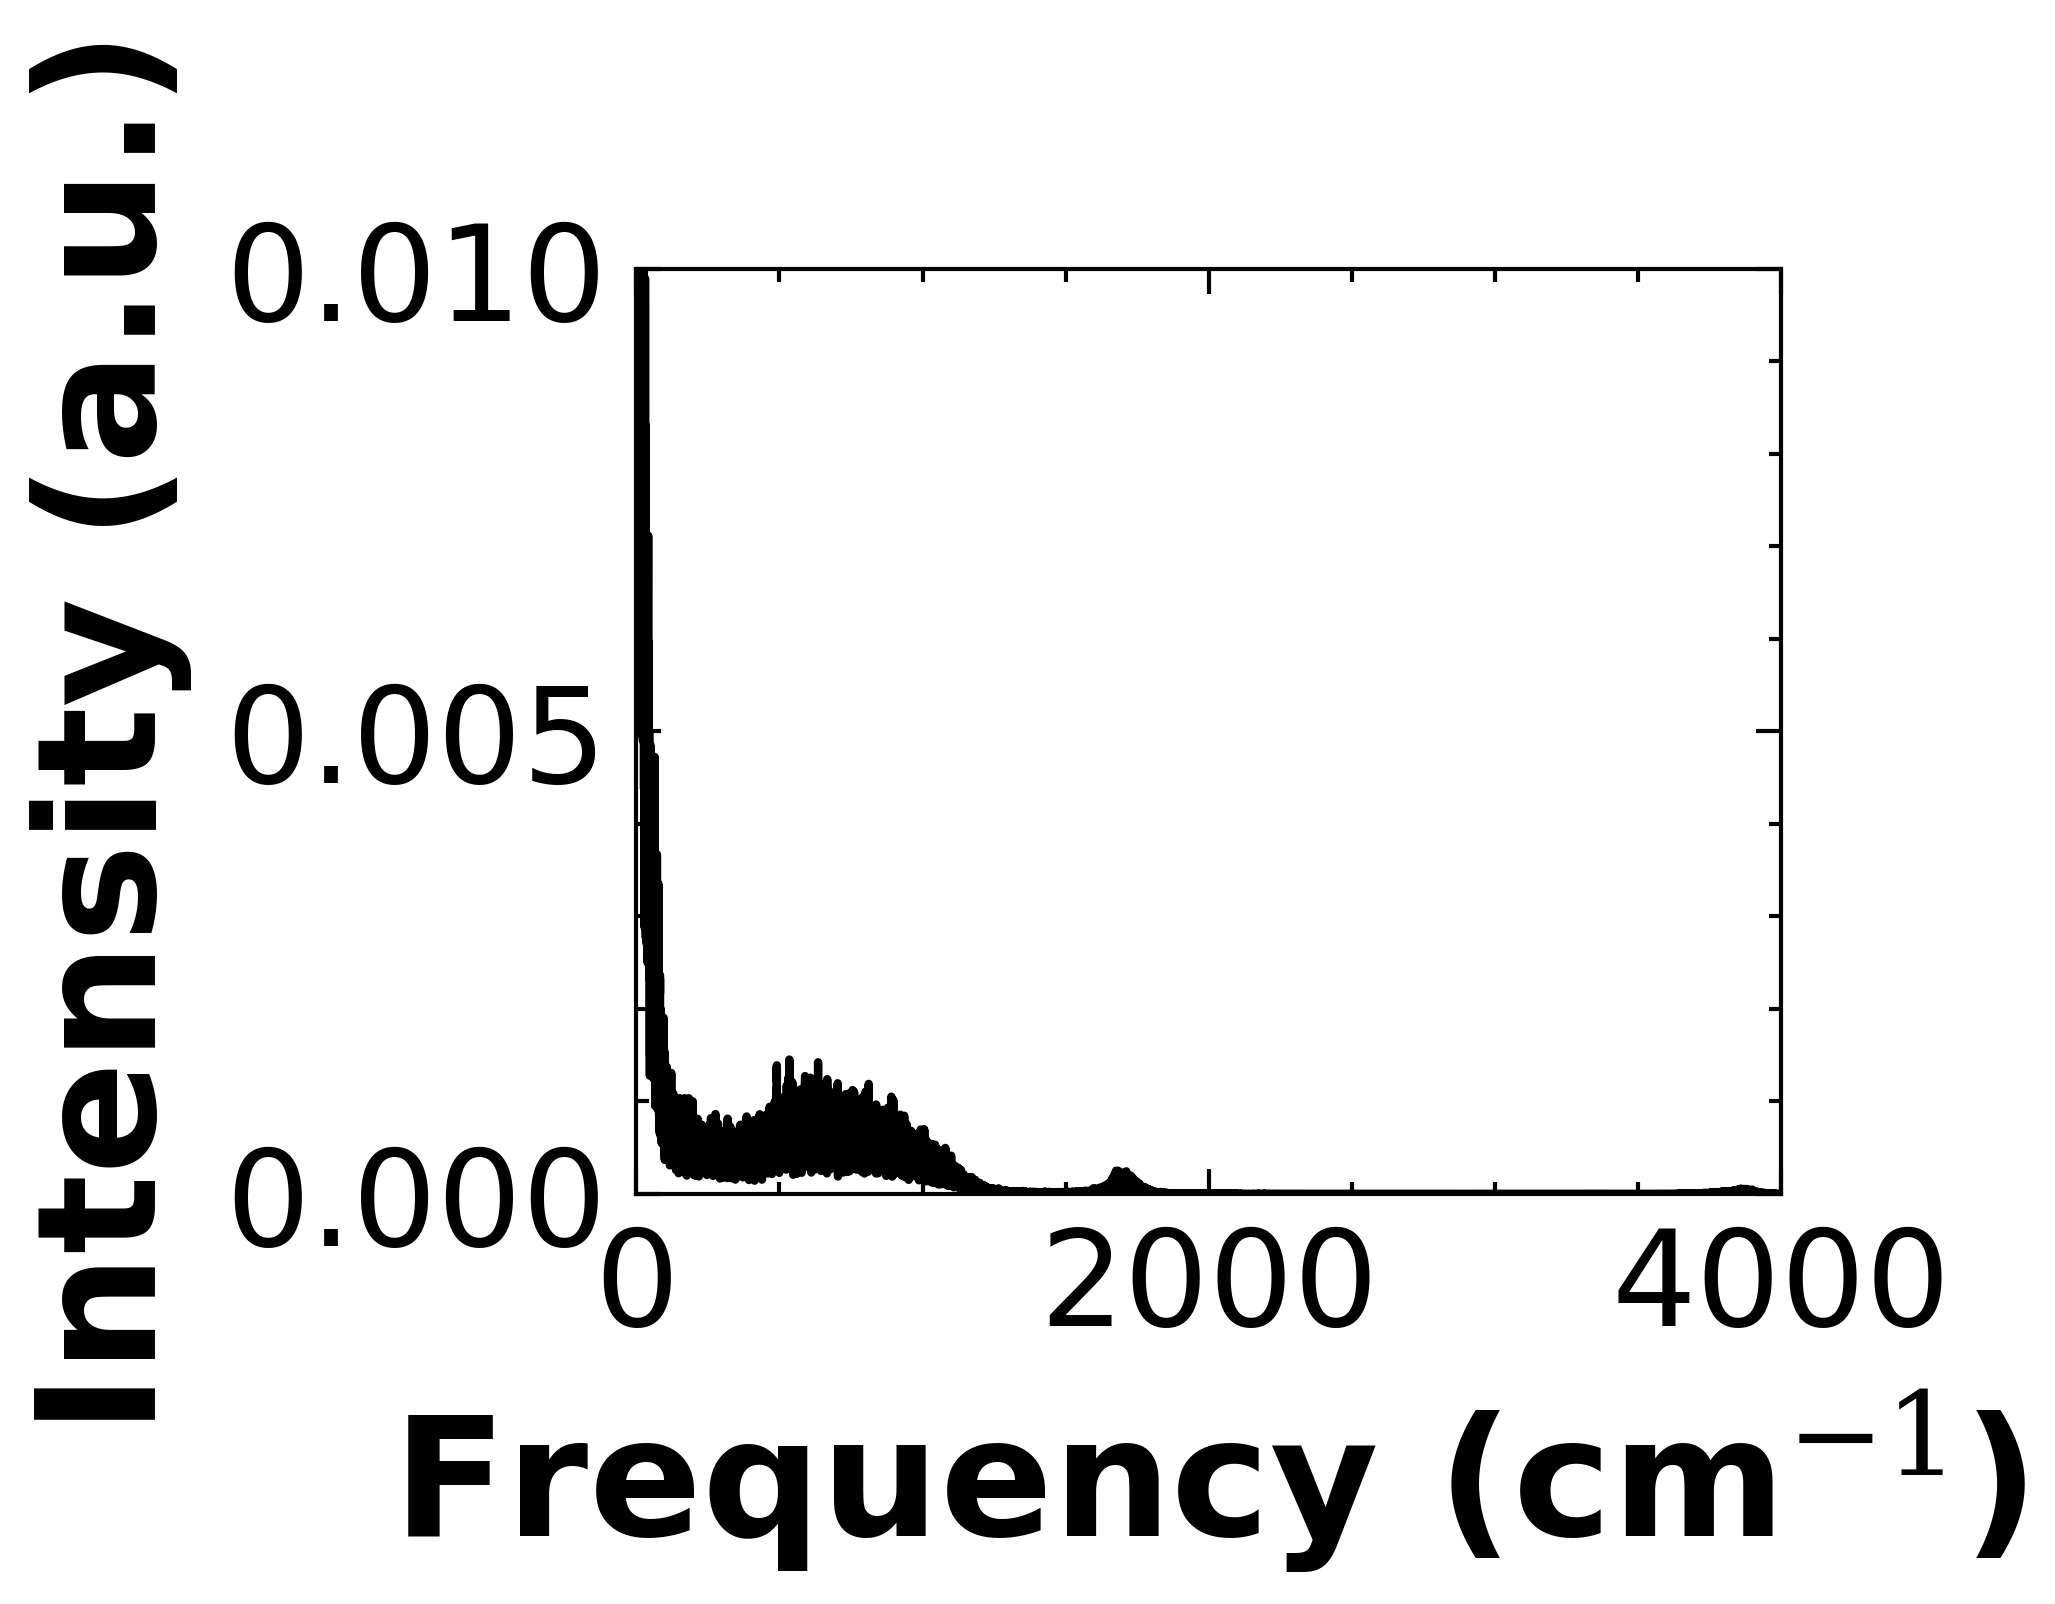

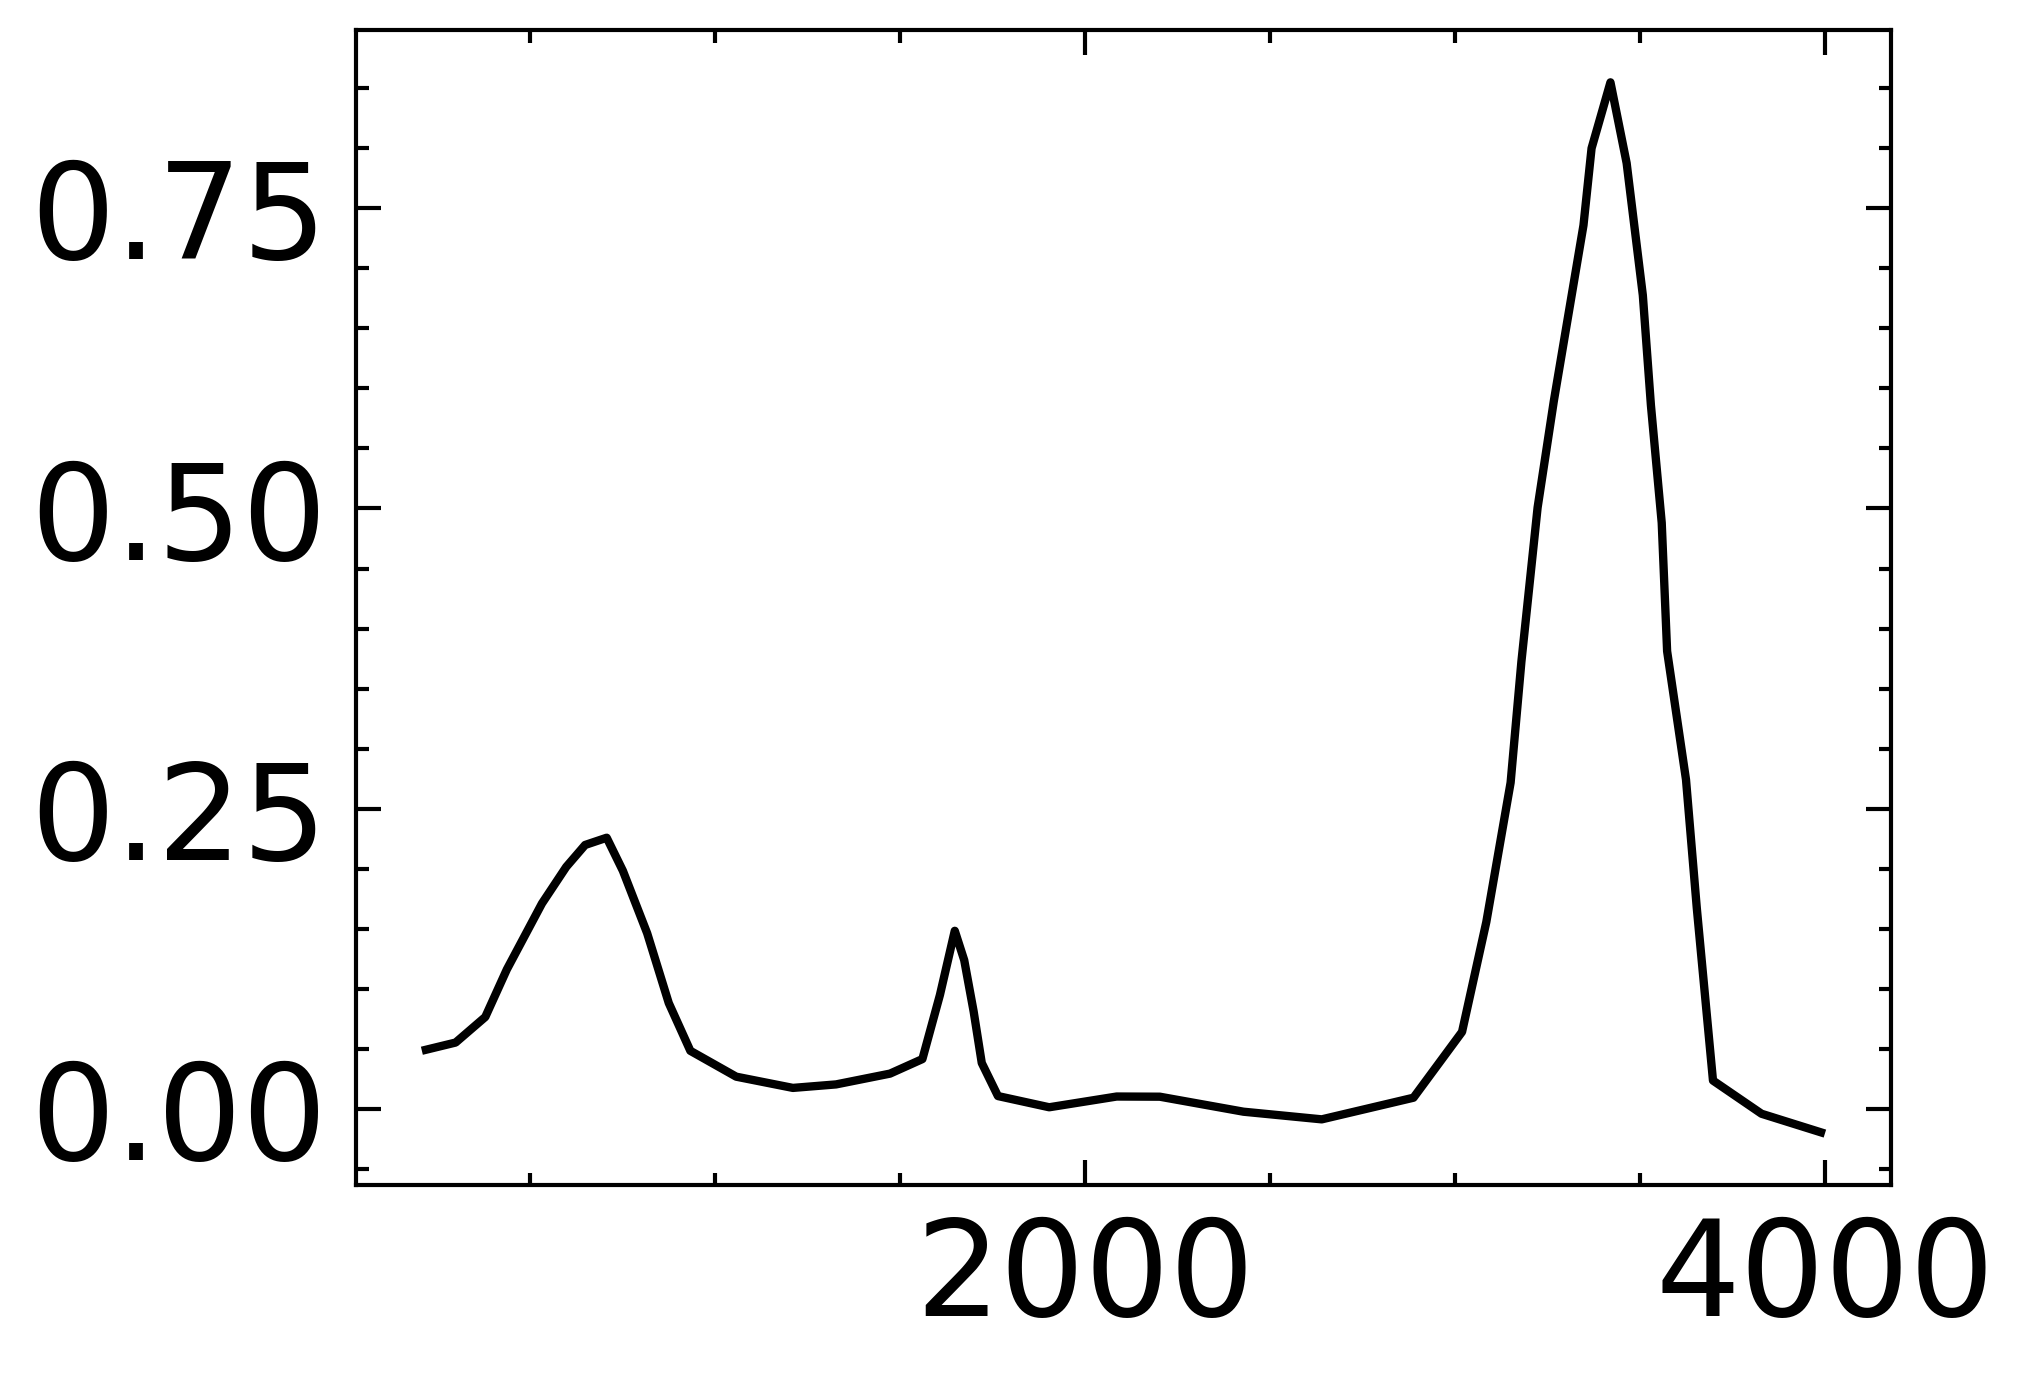

In [56]:
ax, freq, spectra = plot_spectra(None, None, filename="MDCM-nn1111", csv="MDCM-nn1111.csv", Nsmooth=10, xlim=(0, 4000))
# plt.plot(water_exp_spectrum[0], np.array(water_exp_spectrum[1]), label="Exp.")

plt.ylim(0, 0.01)
plt.show()
plt.plot(x, y*0.5 + 0.15)

In [57]:
# temperature in K
Ti = 298.15
# Quantum correction factor qcf
Kb = 3.1668114e-6  # Boltzmann constant in atomic units (Hartree/K)
beta = 1.0 / Kb / float(Ti)  # atomic units
hbar = 1.0  # atomic units
const = beta * hbar  # atomic units
cminvtoau = 1.0 / 2.1947e7  # inv cm to atomic units

qcf = np.tanh(const * freq * cminvtoau / 2.0)

In [58]:
freq

array([1.00879832e+00, 1.04616122e+00, 1.08352412e+00, ...,
       8.33909304e+04, 8.33909678e+04, 8.33910051e+04])

In [59]:
spectraCor = spectra * (freq * (1 - np.exp(-hbar*freq / beta)))

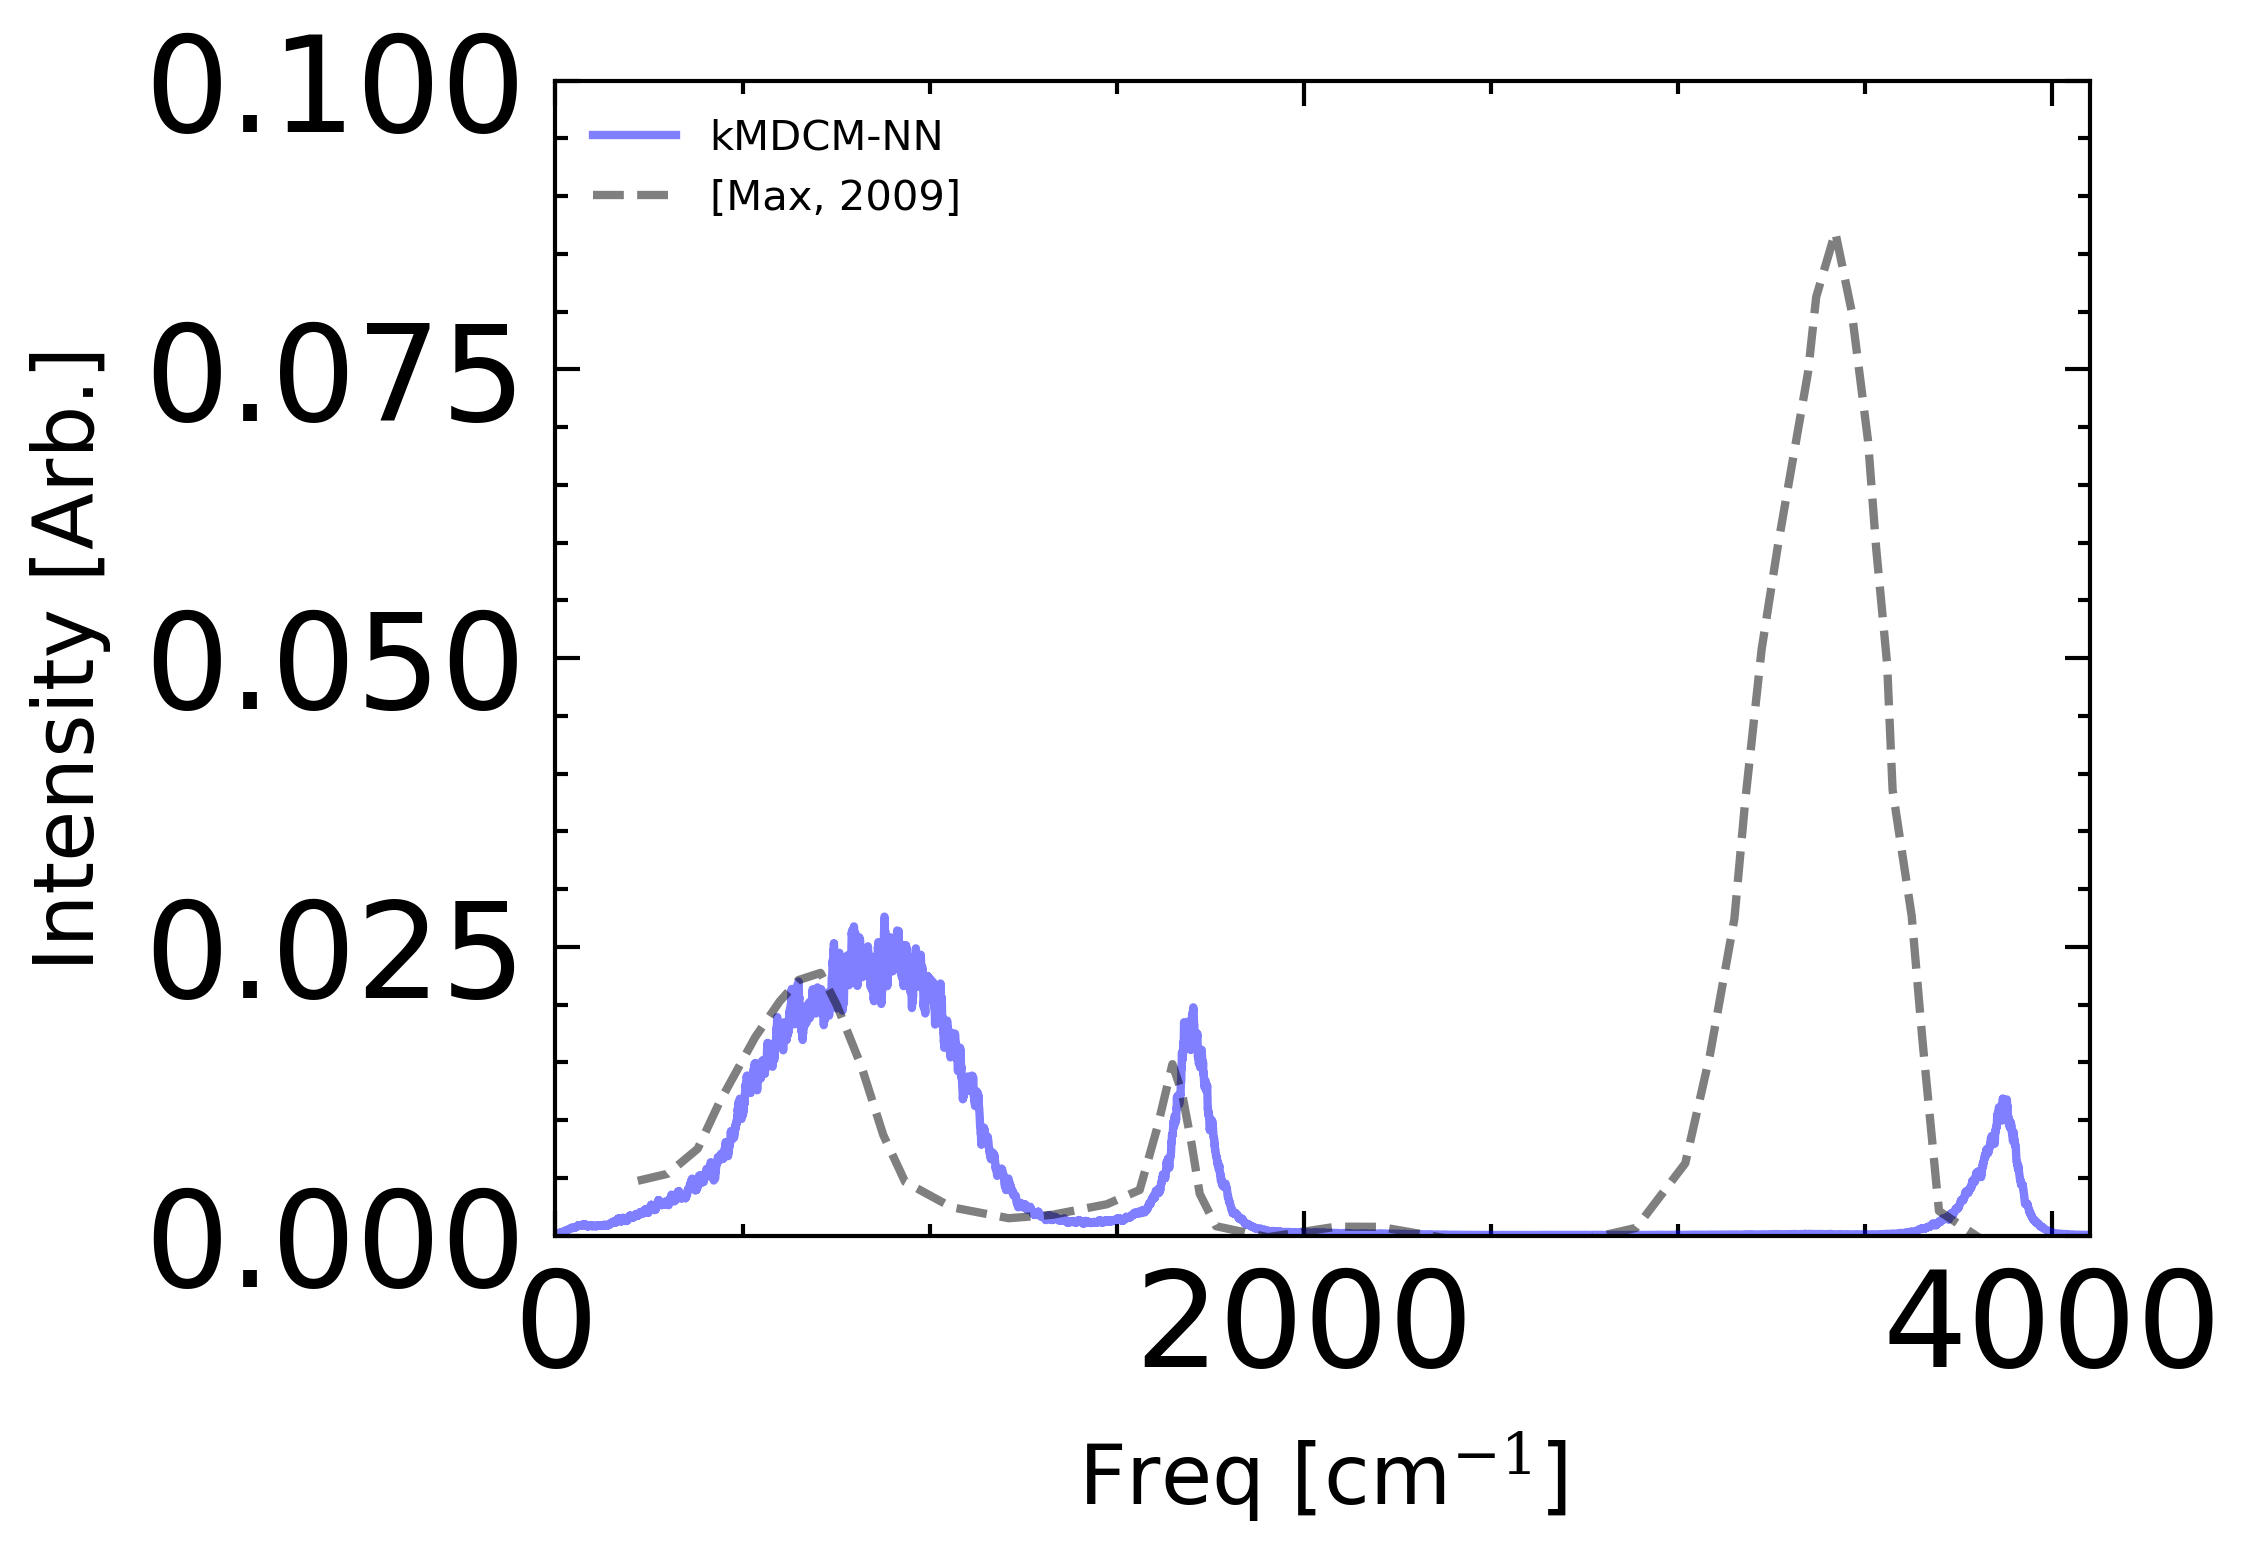

In [64]:
FONTSIZE = 10

plt.style.use(["science", "no-latex", "ieee"])
_df = pd.DataFrame({"freq": freq, "Computed": spectraCor/10})

_df.rolling(200).mean().plot("freq", "Computed", color="blue", 
                            label="kMDCM-NN", alpha=0.5)

# _df.plot("freq", "Computed", color="blue", 
#                             label="kMDCM-NN", alpha=0.5)

plt.xlim(0,4000)
plt.xlabel("Freq [cm$^{-1}$]", fontsize=FONTSIZE)
plt.ylabel("Intensity [Arb.]", fontsize=FONTSIZE)

xy = np.array([[float(x[:-1]) for x in _.split()] for _ in chapados.split("\n")])
x, y = xy.T
plt.plot(x, 
         y*0.051+0.015, label="[Max, 2009]", color="k", linestyle="--", alpha=0.5)
plt.ylim(0, 0.1)
# plt.plot(water_exp_spectrum[0], np.array(water_exp_spectrum[1])*0.5, label="Exp.")

plt.legend(fontsize=FONTSIZE/2)
plt.xlim(0, 4100)
plt.savefig("kNN-ir.pdf", bbox_inches="tight")

In [45]:
_df[_df["freq"] > 1000]

,freq,Computed
29362,1000.019776,2.929792e-03
29363,1000.053800,2.574102e-03
29364,1000.087823,2.017612e-03
29365,1000.121847,1.681044e-03
29366,1000.155871,1.588310e-03
...,...,...
2450946,83390.870694,3.374840e-07
2450947,83390.904717,2.901516e-07
2450948,83390.938741,2.391531e-07
2450949,83390.972764,2.102190e-07


In [20]:
.15*200

30.0

In [21]:
_df[_df["freq"] > 1000][:5000].idxmax()


freq        35463
Computed    31094
dtype: int64

In [289]:
_df[_df["freq"] > 1000][:5000].loc[801]

KeyError: 801

In [ ]:
# freq        1725.799895
# Computed       0.232481
# Name: 647, dtype: float64
##
# freq        1740.126464
# Computed       0.186246
# Name: 10225, dtype: float64

In [ ]:
_df = pd.read_csv("MDCM-nn.csv")
_df["Computed"] = _df["spectra"] * 1
_df.plot("freq", "Computed")
plt.xlim(0, 4000)
plt.plot(x, y*10 + 0.3, label="Ref")
plt.xlim(1000,4000)
plt.legend()
# plt.ylim(0,2)
plt.xlabel("Freq [cm$^{-1}$]", fontsize=20)
plt.ylabel("Intensity [Arb.]", fontsize=20)
plt.savefig("IR.pdf", bbox_inches="tight")

In [ ]:
plt.plot(x, y*10 + 0.3, label="Ref")


In [ ]:
plt.plot(x, y*0.5 + 0.3)
plot_spectra(None, None, filename="MDCM-nn", csv="MDCM-nn.csv", Nsmooth=1)


In [1]:
with open("/home/boittier/pcbach/kmdcm_water_sim_rkhs_copy2/DYNA") as f:
    lines = f.readlines()


In [2]:
ETOT = [float(_[27:41]) for _ in lines]

In [3]:
X = 10000

In [4]:
plt.hist(ETOT[-X:] - np.mean(ETOT[-X:]))

NameError: name 'plt' is not defined

In [5]:
plt.plot(np.arange(len(ETOT[-X:])) * 0.2, ETOT[-X:] - np.mean(ETOT[-X:]))

NameError: name 'plt' is not defined

In [ ]:
847000 * .2

In [4]:
water_rdf_1 = """2.4615076480275357 0.059468174017968334
2.512692313398513 0.3882072509136556
2.5574974407667312 1.423799138515099
2.5603163063958574 1.1114688268079047
2.589246769431628 1.9059735224445984
2.602945467313522 2.388157797130691
2.6548719394290066 2.6347046867350117
2.6890939572422585 2.8429051130266214
2.7816714389567228 2.5853201390640375
2.801551859709508 2.3825695196554055
2.8774634165640496 1.9715690201721972
2.9164824513251135 1.6482599686463002
2.992047831698885 1.2756158232323962
3.1762631732514377 0.8645559792096273
3.4116631801749673 0.7822352120825458
3.717534827826654 0.8916566522756137
4.0769154686487745 1.072281649184752
4.563787961960149 1.1268093902843077
5.197439283117961 0.9182430059987414
5.504695636692729 0.874239029914591
6.099575192004312 0.9615843013911327
6.658353485749892 1.0489493543808615
7.2905706472016565 0.9992878655252708
7.88648873195555 0.971564074793899
8.698618755841729 0.9875574282054682
9.330341379463821 0.992690730877456
10.449431034226963 0.9975569831214215
11.31596021937698 0.9861232684994214
"""

water_rdf_2 = """2.412776412776413 0.03828650785172538
2.515970515970516 0.438436064523021
2.5454545454545454 1.142826621087491
2.633906633906634 1.9951287255635082
2.751842751842752 2.482256169212691
2.86977886977887 2.065035786774917
2.9729729729729732 1.4999679521418652
3.194103194103194 0.9437666915927785
3.385749385749386 0.8483922657835701
3.8574938574938575 0.9882063882063881
4.211302211302211 1.0582843713278498
4.535626535626536 1.0500587544065805
4.88943488943489 1.0157889114410854
5.213759213759214 0.9988676423459031
5.523341523341523 0.9471423993163122
5.803439803439803 0.9388526866787736
6.083538083538084 0.9653455827368871
6.378378378378379 1.0179468005554961
6.658476658476658 1.0444396966136096
6.968058968058967 1.036192714453584
7.616707616707616 1.0110458284371329
8.132678132678132 1.0030979596196985
8.737100737100738 1.0039739344087169
9.533169533169533 0.9964320051276572
9.93120393120393 1.01440017092191
"""


def plot_rdf_exp(ax, shift=0, c="k", lw=0.5, linestyle="--", marker="o"):
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_1.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        "-",
        fillstyle="none",
        marker=marker,
        c=c,
        alpha=0.5,
        label="[Hura, 2003]",
        linewidth=lw,
    )
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_2.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        linestyle,
        fillstyle="none",
        c=c,
        alpha=0.5,
        marker=marker,
        label="[Soper, 2007]",
        linewidth=lw,
    )
    return ax

In [5]:
27.080373764038086**3

19859.301196458742

In [6]:
# import pylab as plt


In [7]:
import numpy as np
import matplotlib.pyplot as plt
#  matplotlib styles
plt.style.use(["science", "ieee", "notebook" ])

# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })
# params = {'text.usetex': True, 
#           'text.latex.preamble': [r'\usepackage{cmbright}', r'\usepackage{amsmath}']}
# plt.rcParams.update(params)
# plt.rcParams['text.usetex'] = True 
# plt.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'cm'
# plt.rc('font', family='sans-serif')

with open("/home/boittier/pcbach/waterlj/10000-kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a/multiplot.dat") as f:
    lines = f.readlines()
    results = [[float(x) for x in _.split()] for _ in lines[:-1]]
results = np.array(results)

with open("/home/boittier/pcbach/shake/shake-rdf.dat") as f:
    lines = f.readlines()
    Sresults = [[float(x) for x in _.split()] for _ in lines]
Sresults = np.array(Sresults)

with open("/home/boittier/Downloads/SWM4-HLJ/multiplot.dat") as f:
    lines = f.readlines()
    SWMPresults = [[float(x) for x in _.split()] for _ in lines[:-1]]
SWMPresults = np.array(SWMPresults)

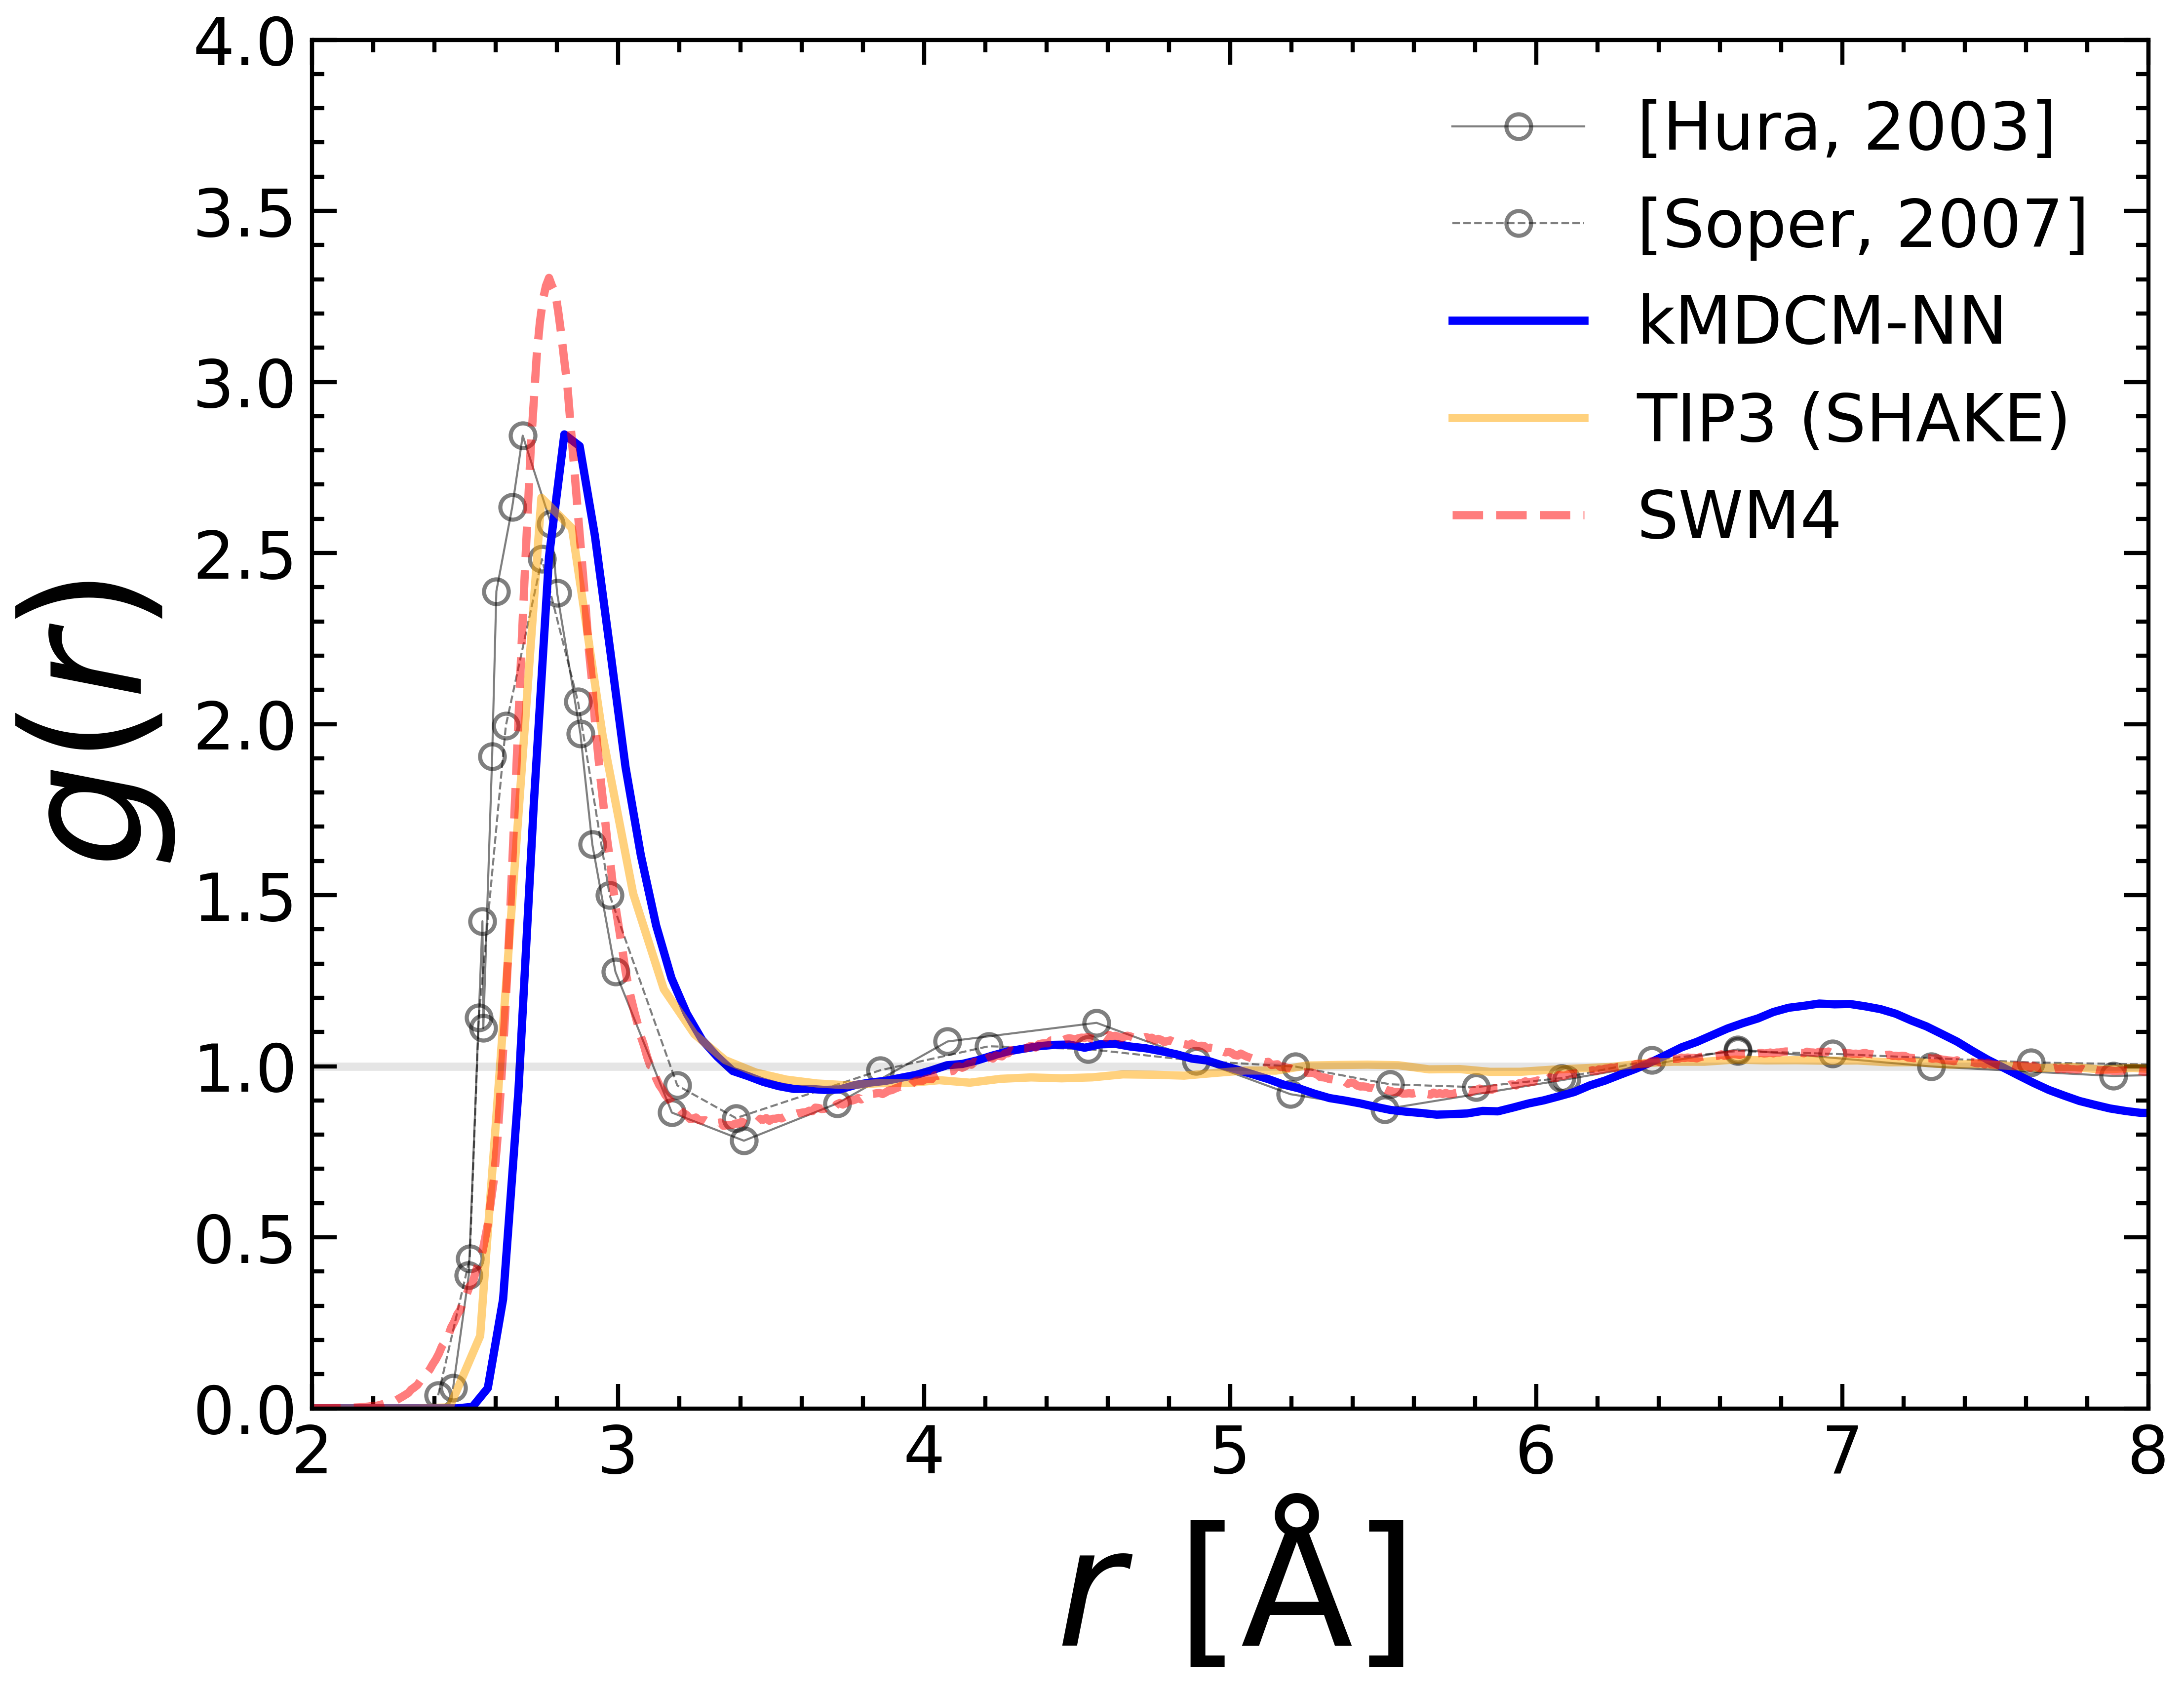

In [8]:
# plt.rcParams['mathtext.fontset'] = 'cm'

ax = plt.gca()
plot_rdf_exp(ax)
ax.plot(*results.T, label="kMDCM-NN", c="b")
ax.plot(*Sresults.T, label="TIP3 (SHAKE)", linestyle="-", c="orange", alpha=0.51)
ax.plot(*SWMPresults.T, label="SWM4", c="r", alpha=0.51)
plt.legend()
plt.ylabel("$g(r)$", fontsize=40)
plt.xlabel("$r$ [Å]", fontsize=40)
plt.savefig("rdf_.pdf", bbox_inches="tight")
plt.xlim(2,8)
plt.ylim(0,4)
plt.axhline(1, color="k", alpha=0.1)
plt.savefig("kmdcm-rdf-.pdf", bbox_inches="tight")

In [36]:
plt.rcParams["mathtext.fontset"] = "dejavusans"

Text(0.5, 1.0, 'ABC123 vs $\\mathrm{ABC123}^{123}$')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Helvetica


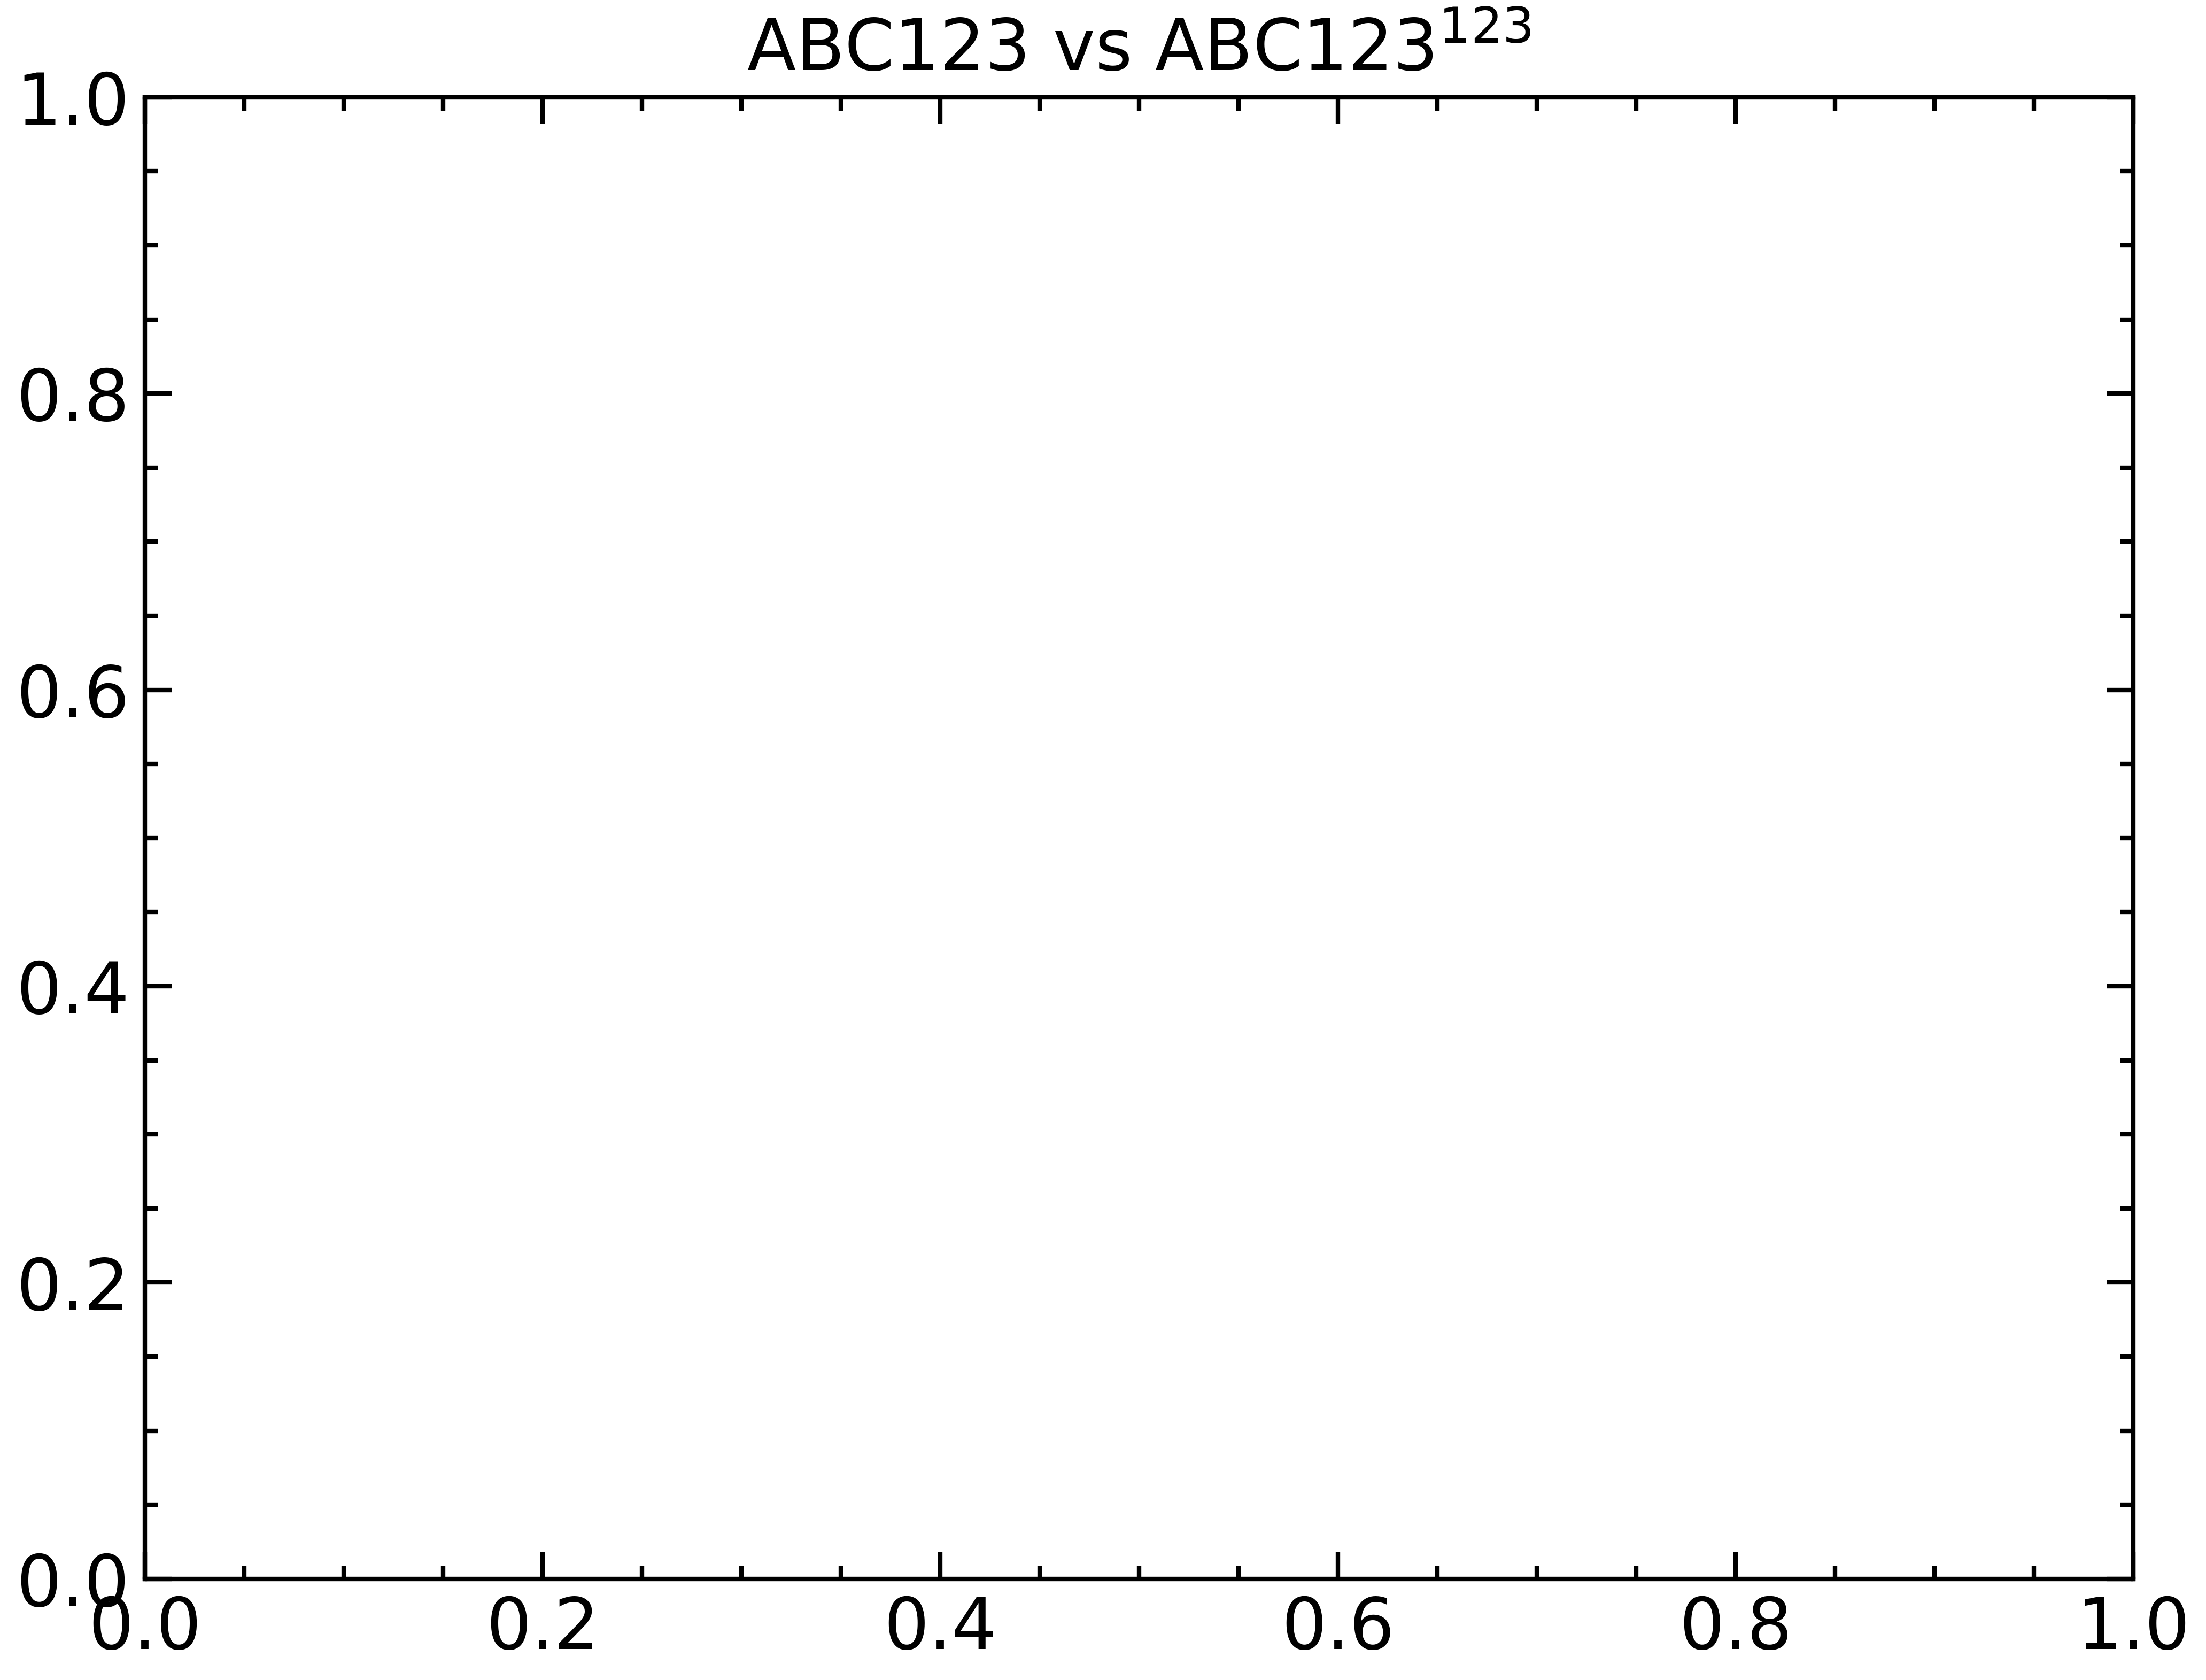

In [25]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')